<div style="display: flex; justify-content: center; align-items: center; padding: 20px;">
    <div style="flex-shrink: 0; display: flex; align-items: center; padding-right: 20px;">
        <img src="https://adnova.novaims.unl.pt/media/22ui3ptm/logo.svg" alt="Nova IMS Logo" style="width: 200px;"/>
    </div>
    <div style="text-align: center;">
        <h1>ABCDEats Inc. - Data Mining Project</h1>
        <h3>Fall Semester 2024-2025</h3>
        <h2>Group 47 Members:</h2>
        <ul style="list-style-type:none; padding: 0;">
            <li>Chiel Groeneveld, 20240662 </li>
            <li>Daan van Holten, 20240681 </li>
            <li>Diogo Ruivo, 20240584 </li>
            <li>Zofia Wójcik, 20240654 </li>
        </ul>
    </div>
</div>


**Table of Contents** <br>
* [1.Project objectives](#projectobjectives)
    * [1.1 Part 1](#part1)
    * [1.2 Dataset](#dataset)
* [2.Import Libraries](#importlibraries)
* [3.Import Dataset](#importdataset)
* [4.Initial Pre-Processing](#initialpreprocessing)
    * [4.1 Duplicated Rows](#duplicatedrows)
    * [4.2 Filling Empty Cells](#fillemptycells)
    * [4.3 Redefining Variables](#redefiningvariables)
* [5.Exploratory Data Analysis](#eda)
    * [5.1 Individual Feature Analysis](#individualanal)
    * [5.2 Data Categorization](#datacategorization)
    * [5.3 New Feature Creation](#newfeature)
    * [5.4 Spearman Correlation](#spearmancorrelation)

<hr>
<a class="anchor" id="projectobjectives">
    
# 1. Project objectives 
    
</a>

In this project, you will act as consultants for ABCDEats Inc. (ABCDE), a fictional food delivery service partnering with a range of restaurants to offer diverse meal options. Your task is to analyse customer data collected over three months from three cities to help ABCDE develop a data-driven strategy tailored to various customer segments. <br>

We recommend segmenting customers using multiple perspectives. Examples of segmentation perspectives include value-based segmentation, which groups customers by their economic value; preference or behaviour-based segmentation which focuses on purchasing habits; and demographic segmentation which categorises customers by attributes like age, gender, and income to understand different interaction patterns. <br>

Ultimately, the company seeks a final segmentation that integrates these perspectives to enable them to develop a comprehensive marketing strategy.

<hr>
<a class="anchor" id="part1">
    
## 1.1 Part 1
    
</a>

Part 1: Exploratory Data Analysis <br>

**Expected Outcomes**
- Conduct an in-depth exploration of the dataset.
Summarise key statistics for the data, and discuss
their possible implications.
- Identify any trends, patterns, or anomalies within
the dataset. Explore relationships between features.
- Create new features that may help enhance your
analysis.
- Use visualisations to effectively communicate
your findings.

<hr>
<a class="anchor" id="dataset">
    
## 1.2 Dataset
    
</a>

The dataset provided for this project includes customer data from ABCDEats Inc. and consists of multiple columns capturing various customer attributes and aggregating their behaviour over a three-month period. <br>
Each row corresponds to one customer, and the column descriptions are given below:

# Dataset Description

| Column Number | Column Name         | Description                                                                                          |
|---------------|---------------------|------------------------------------------------------------------------------------------------------|
| 1             | customer_id         | Unique identifier for each customer.                                                                 |
| 2             | customer_region     | Geographic region where the customer is located.                                                     |
| 3             | customer_age        | Age of the customer.                                                                                 |
| 4             | vendor_count        | Number of unique vendors the customer has ordered from.                                              |
| 5             | product_count       | Total number of products the customer has ordered.                                                   |
| 6             | is_chain            | Indicates whether the customer’s order was from a chain restaurant.                                  |
| 7             | first_order         | Number of days from the start of the dataset when the customer first placed an order.                |
| 8             | last_order          | Number of days from the start of the dataset when the customer most recently placed an order.        |
| 9             | last_promo          | The category of the promotion or discount most recently used by the customer.                        |
| 10            | payment_method      | Method most recently used by the customer to pay for their orders.                                   |
| 11            | CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc. | The amount in monetary units spent by the customer from the indicated type of cuisine.          |
| 12            | DOW_0 to DOW_6      | Number of orders placed on each day of the week (0 = Sunday, 6 = Saturday).                          |
| 13            | HR_0 to HR_23       | Number of orders placed during each hour of the day (0 = midnight, 23 = 11 PM).                      |


<hr>
<a class="anchor" id="importlibraries">
    
# 2. Import libraries
    
</a>

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skewnorm
from sklearn.preprocessing import MinMaxScaler

import math
from math import ceil

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'

sns.set()

<hr>
<a class="anchor" id="importdataset">
    
# 3. Import Dataset
    
</a>

In [2]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv')

<hr>
<a class="anchor" id="initialpreprocessing">
    
# 4. Initial Preprocessing
    
</a>

In [3]:
df.head(30)

customer_id customer_region  customer_age  vendor_count  product_count  \
0   1b8f824d5e            2360          18.0             2              5   
1   5d272b9dcb            8670          17.0             2              2   
2   f6d1b2ba63            4660          38.0             1              2   
3   180c632ed8            4660           NaN             2              3   
4   4eb37a6705            4660          20.0             2              5   
5   6aef2b6726            8670          40.0             2              2   
6   8475ee66ef            2440          24.0             2              2   
7   f2f53bcc67            8670          27.0             2              3   
8   5b650c89cc            2360          20.0             3              4   
9   84775a7237            8670          20.0             2              3   
10  dd4bcde51a            2360          20.0             2              4   
11  4eff9f04bf            4660          18.0             2              3   
12  8733352e37               -          33.0             2              3   
13  dce8e4700a            8670          26.0             2              2   
14  f3070b7bbf            2360          21.0             2              2   
15  f49ed5489a            8670          51.0             2              2   
16  7c027ecfd3            4660          35.0             1              2   
17  7d9a62afd6            2440          27.0             2              3   
18  d5ef759319            8670          22.0             3              4   
19  dd27b47fb5            4660          31.0             2              2   
20  e79f867434            8670          15.0             2              3   
21  eb13ad08ad            8670          47.0             4              6   
22  fd1202393e            2360          24.0             2              3   
23  1f1fe12bed            8670          26.0             5              6   
24  29786040d4            4140          22.0             2              2   
25  47e04c1274            2360          24.0             2              3   
26  68e63f5236            2360          31.0             2              3   
27  8e8652bdc8            4660           NaN             2              3   
28  b92ab1eeec            2360          47.0             5              6   
29  ccd38a80b8            2360          35.0             2              3   

    is_chain  first_order  last_order last_promo payment_method  ...  HR_14  \
0          1          0.0           1   DELIVERY           DIGI  ...      0   
1          2          0.0           1   DISCOUNT           DIGI  ...      0   
2          2          0.0           1   DISCOUNT           CASH  ...      0   
3          1          0.0           2   DELIVERY           DIGI  ...      1   
4          0          0.0           2          -           DIGI  ...      0   
5          0          0.0           2    FREEBIE           DIGI  ...      0   
6          2          0.0           2          -           CARD  ...      0   
7          2          0.0           2   DISCOUNT           DIGI  ...      0   
8          2          0.0           3   DISCOUNT           DIGI  ...      0   
9          0          0.0           3   DELIVERY           CARD  ...      0   
10         2          0.0           3   DELIVERY           CASH  ...      0   
11         1          0.0           4   DELIVERY           CARD  ...      0   
12         1          0.0           4   DISCOUNT           DIGI  ...      0   
13         0          0.0           4          -           DIGI  ...      0   
14         2          0.0           4          -           CASH  ...      0   
15         2          0.0           4    FREEBIE           CARD  ...      0   
16         2          0.0           5   DELIVERY           CASH  ...      0   
17         2          0.0           5          -           DIGI  ...      0   
18         2          0.0           5   DELIVERY           DIGI  ...      0   
19         1          0.0          

In [4]:
df.shape

(31888, 56)

In [5]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [7]:
df.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [8]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [9]:
df.describe(include = 'all').T

count unique         top   freq       mean  \
customer_id                 31888  31875  742ca068fc      2        NaN   
customer_region             31888      9        8670   9761        NaN   
customer_age              31161.0    NaN         NaN    NaN  27.506499   
vendor_count              31888.0    NaN         NaN    NaN   3.102609   
product_count             31888.0    NaN         NaN    NaN   5.668245   
is_chain                  31888.0    NaN         NaN    NaN   2.818866   
first_order               31782.0    NaN         NaN    NaN  28.478604   
last_order                31888.0    NaN         NaN    NaN  63.675521   
last_promo                  31888      4           -  16748        NaN   
payment_method              31888      3        CARD  20161        NaN   
CUI_American              31888.0    NaN         NaN    NaN   4.880438   
CUI_Asian                 31888.0    NaN         NaN    NaN   9.960451   
CUI_Beverages             31888.0    NaN         NaN    NaN   2.300633   
CUI_Cafe                  31888.0    NaN         NaN    NaN   0.801163   
CUI_Chicken Dishes        31888.0    NaN         NaN    NaN   0.768096   
CUI_Chinese               31888.0    NaN         NaN    NaN   1.431218   
CUI_Desserts              31888.0    NaN         NaN    NaN   0.884359   
CUI_Healthy               31888.0    NaN         NaN    NaN   0.950203   
CUI_Indian                31888.0    NaN         NaN    NaN   1.631153   
CUI_Italian               31888.0    NaN         NaN    NaN   3.233411   
CUI_Japanese              31888.0    NaN         NaN    NaN   2.995379   
CUI_Noodle Dishes         31888.0    NaN         NaN    NaN   0.711676   
CUI_OTHER                 31888.0    NaN         NaN    NaN   2.999913   
CUI_Street Food / Snacks  31888.0    NaN         NaN    NaN   3.913253   
CUI_Thai                  31888.0    NaN         NaN    NaN   0.841697   
DOW_0                     31888.0    NaN         NaN    NaN   0.555914   
DOW_1                     31888.0    NaN         NaN    NaN   0.567486   
DOW_2                     31888.0    NaN         NaN    NaN   0.591006   
DOW_3                     31888.0    NaN         NaN    NaN   0.619449   
DOW_4                     31888.0    NaN         NaN    NaN   0.677747   
DOW_5                     31888.0    NaN         NaN    NaN   0.652973   
DOW_6                     31888.0    NaN         NaN    NaN   0.704246   
HR_0                      30723.0    NaN         NaN    NaN        0.0   
HR_1                      31888.0    NaN         NaN    NaN   0.053845   
HR_2                      31888.0    NaN         NaN    NaN    0.06319   
HR_3                      31888.0    NaN         NaN    NaN   0.118759   
HR_4                      31888.0    NaN         NaN    NaN     0.1017   
HR_5                      31888.0    NaN         NaN    NaN   0.081943   
HR_6                      31888.0    NaN         NaN    NaN   0.069681   
HR_7                      31888.0    NaN         NaN    NaN     0.0768   
HR_8                      31888.0    NaN         NaN    NaN   0.131899   
HR_9                      31888.0    NaN         NaN    NaN   0.233912   
HR_10                     31888.0    NaN         NaN    NaN    0.32956   
HR_11                     31888.0    NaN         NaN    NaN   0.378167   
HR_12                     31888.0    NaN         NaN    NaN   0.314162   
HR_13                     31888.0    NaN         NaN    NaN   0.236453   
HR_14                     31888.0    NaN         NaN    NaN    0.21563   
HR_15                     31888.0    NaN         NaN    NaN   0.277032   
HR_16                     31888.0    NaN         NaN    NaN   0.356435   
HR_17                     31888.0    NaN         NaN    NaN   0.390962   
HR_18                     31888.0    NaN         NaN    NaN   0.336961   
HR_19                     31888.0    NaN         NaN    NaN    0.24561   
HR_20                     31888.0    NaN         NaN    NaN   0.142812   
HR_21                     31888.

In [10]:
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

<hr>
<a class="anchor" id="duplicatedrows">
    
## 4.1 Duplicated Rows
    
</a>

In [11]:
#costumer id should be a unique feature, as freq = 2, we know there are duplicates
duplicates_customer_id = df['customer_id'].groupby(df['customer_id']).size()[df['customer_id'].groupby(df['customer_id']).size() > 1]
duplicates_customer_id.count()

13

In [12]:
#check if only customer id is dulpicated, or the whole row
df.duplicated().sum() #not only the customer id, the whole row is duplicated, we should eliminate them

13

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum() #check

0

In [15]:
#after removing duplicate customer id's, we can drop the customer_id column and assume 1,2,3... as their new id
df = df.iloc[0:, 1:56]

<hr>
<a class="anchor" id="fillemptycells">
    
## 4.2 Filling Empty Cells
    
</a>

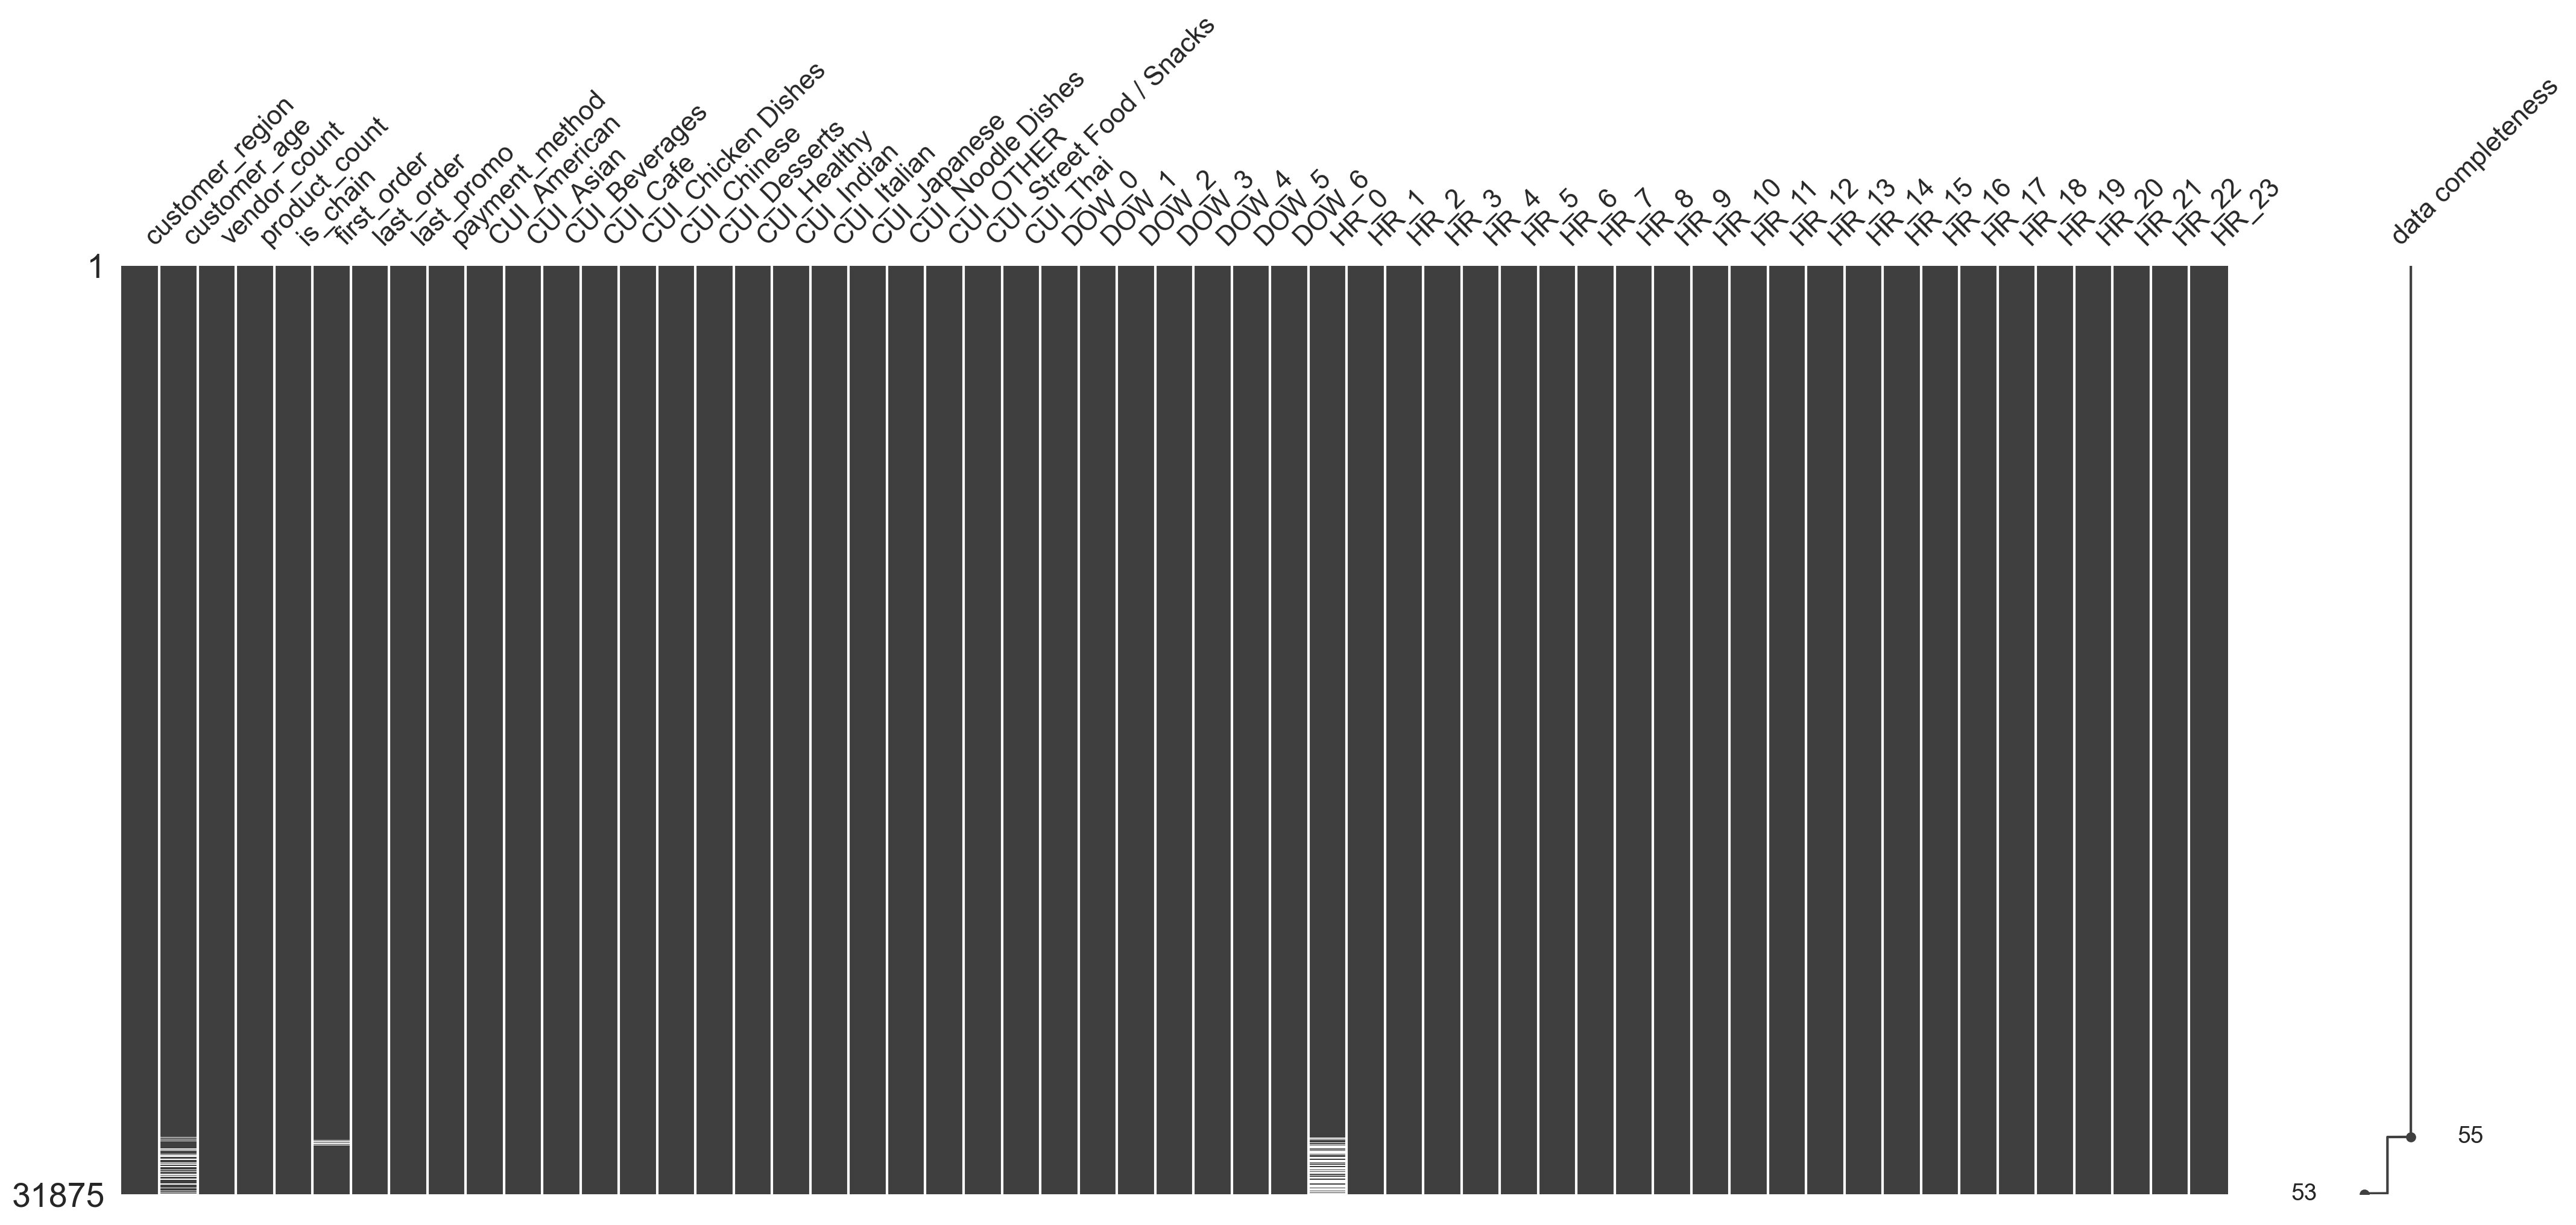

In [16]:
# Visualize the missing values in the dataset
msno.matrix(df, labels=True, sort="descending");

In [17]:
# Check the missing values in rows instead of columns
df.isnull().sum(axis=1).value_counts().sort_index(ascending=False)

2       30
1     1937
0    29908
Name: count, dtype: int64

In [18]:
#there are 3 columns with NaN values, we will treat all of them as it is necessary for data visualization
df.isna().sum()

customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5                          0
DOW_6     

#### customer_Age

In [19]:
#decide on wether to turn nan into median or mean, we see which one is smaller and choose it
print(f'median: {df["customer_age"].median()}')
print(f'mean: {df["customer_age"].mean()}')

median: 26.0
mean: 27.50754462565815


In [20]:
# we decided to fill with the median
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)

#### first_order

In [21]:
# we suspect that NaNs for first_order just did their first_order today
print(df[df['first_order'].isna()]['last_order'].value_counts()) # as we can see all last_order is set to 0
print(df[df['first_order'].isna()]
      [['DOW_0','DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']].value_counts()) 
# we can even see that the dataset was concluded on a sunday
# given this information, we will set these NaNs as the day next to the max value in the 'first_order' values

last_order
0    106
Name: count, dtype: int64
DOW_0  DOW_1  DOW_2  DOW_3  DOW_4  DOW_5  DOW_6
0      0      0      0      0      0      1        104
                                          2          2
Name: count, dtype: int64


In [22]:
# given this information, we will set these NaNs as the day next to the max value in the 'first_order' values
df['first_order'].max()

90.0

In [145]:
df['first_order'].fillna(91, inplace=True)

#### HR_0

In [24]:
# for HR_0
Total_Orders_Week = df.iloc[:, 24:31].sum(axis=1) #sum all DOW columns
Total_Orders_Hour = df.iloc[:, 32:-1].sum(axis=1) #sum all HR columns, dont count HR_0 as it is full of zeros
df['HR_0'] = Total_Orders_Week - Total_Orders_Hour

In [25]:
df.isna().sum()

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

In [26]:
# Check the missing values in rows again
df.isnull().sum(axis=1).value_counts().sort_index(ascending=False)

0    31875
Name: count, dtype: int64

<hr>
<a class="anchor" id="redefiningvariables">
    
## 4.3 Redefining Variables
    
</a>

**Redefining DataTypes**

In [27]:
#age, first_order and HR_0 should be integers, the rest seems correct
df['customer_age'] = df['customer_age'].astype('int64')
df['first_order'] =df['first_order'].astype('int64')
df['HR_0'] =df['HR_0'].astype('int64')
df.dtypes

customer_region              object
customer_age                  int64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                   int64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

**Redefining Names**

In [28]:
df.rename(columns={'CUI_Chicken Dishes': 'CUI_Chicken_Dishes'}, inplace=True)
df.rename(columns={'CUI_Noodle Dishes': 'CUI_Noodle_Dishes'}, inplace=True)
df.rename(columns={'CUI_Street Food / Snacks': 'CUI_Street_Food/Snacks'}, inplace=True)

<hr>
<a class="anchor" id="eda">
    
# 5.Exploratory Data Analysis
    
</a>

<hr>
<a class="anchor" id="individualanal">
    
## 5.1 Individual Feature Analysis
    
</a>

#### customer_region

In [29]:
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

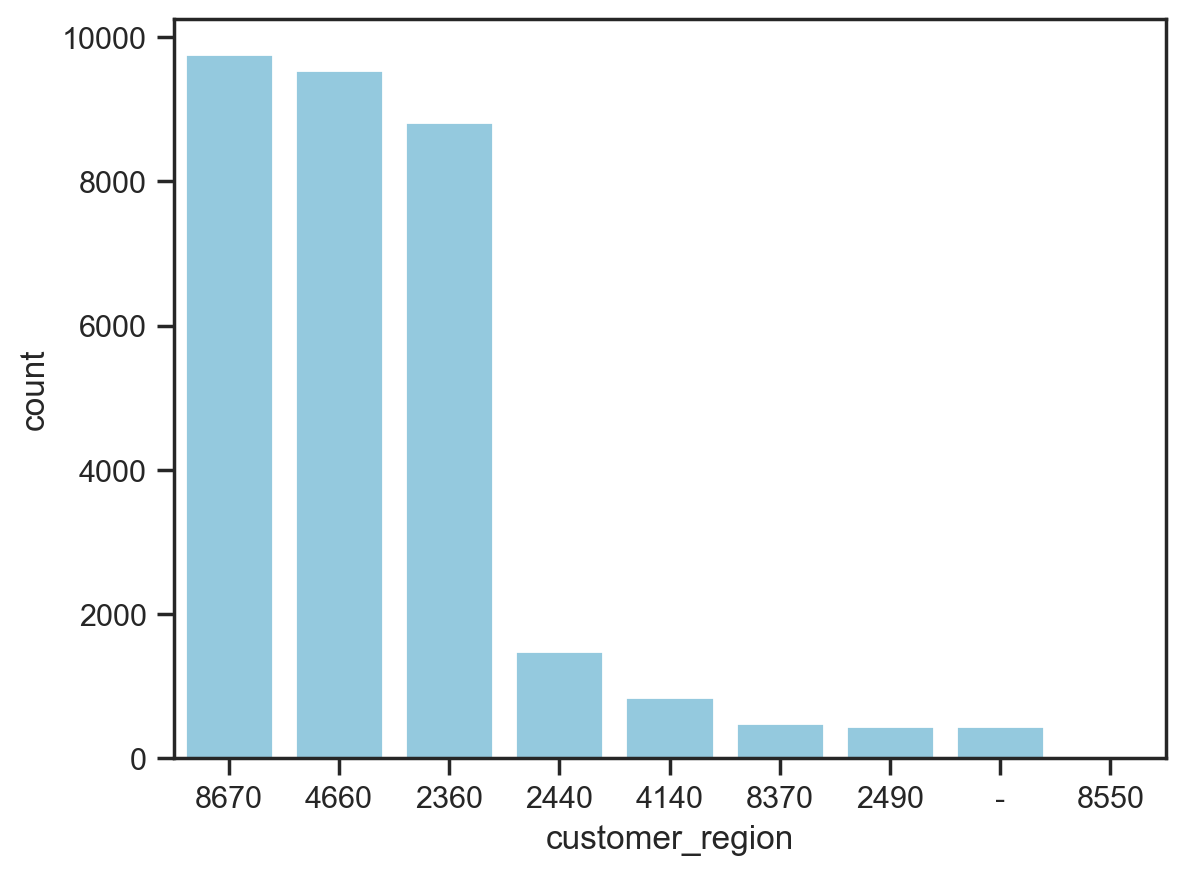

In [30]:
sns.set_style('ticks')
sns.countplot(x=df['customer_region'], color='skyblue',
              order=df['customer_region'].value_counts(ascending=False).index
             )
plt.show()

In [31]:
df['customer_region'].value_counts(normalize=True)

customer_region
8670    0.306227
4660    0.299608
2360    0.276988
2440    0.046525
4140    0.026886
8370    0.015529
2490    0.013961
-       0.013867
8550    0.000408
Name: proportion, dtype: float64

- We have 8 distinct regions + `'_'` (Unknown)
- Almost 90% of the customers come from 3 regions
- Seems like a 'good quality' variable since there is not many values missing 

## `customer_age`

In [32]:
df['customer_age'].unique()

array([18, 17, 38, 26, 20, 40, 24, 27, 33, 21, 51, 35, 22, 31, 15, 47, 19,
       28, 32, 25, 37, 42, 48, 16, 34, 29, 23, 30, 39, 46, 41, 49, 53, 36,
       43, 44, 45, 57, 58, 68, 56, 61, 60, 54, 59, 50, 55, 52, 65, 75, 66,
       79, 80, 63, 77, 62, 69, 72, 64, 76, 74, 67, 70, 78, 71, 73],
      dtype=int64)

In [33]:
df['customer_age'].value_counts(normalize=True, bins=8)

customer_age
(23.125, 31.25]                 0.463843
(14.934000000000001, 23.125]    0.317522
(31.25, 39.375]                 0.153129
(39.375, 47.5]                  0.046933
(47.5, 55.625]                  0.013584
(55.625, 63.75]                 0.003294
(63.75, 71.875]                 0.000973
(71.875, 80.0]                  0.000722
Name: proportion, dtype: float64

In [34]:
df['customer_age'].describe()

count    31875.000000
mean        27.473161
std          7.083258
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

- No unusual values
- We can clearly see that majority of our customers is young
- Average customer is 26 years old
- Almost half of the customers are between 23 and 31 years old

## `vendor_count`

In [35]:
df['vendor_count'].unique()

array([ 2,  1,  3,  4,  5,  7,  6, 11,  9,  8, 12, 14, 20, 13, 10, 16, 24,
       18, 17, 15, 25, 30, 19, 21, 23, 22, 28, 32, 41, 40, 26,  0, 27, 34,
       31, 35, 29], dtype=int64)

In [36]:
df['vendor_count'].describe()

count    31875.000000
mean         3.102714
std          2.771753
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         41.000000
Name: vendor_count, dtype: float64

In [37]:
zero_vendor_count = df[df['vendor_count'] == 0].shape[0]

print(f"Number of people with vendor_count equal to 0: {zero_vendor_count} ({zero_vendor_count/len(df['vendor_count']) * 100}%)")

Number of people with vendor_count equal to 0: 138 (0.4329411764705882%)


In [38]:
one_vendor_count = df[df['vendor_count'] == 1].shape[0]

print(f"Number of people with vendor_count equal to 1: {one_vendor_count} ({one_vendor_count/len(df['vendor_count']) * 100}%)")

Number of people with vendor_count equal to 1: 9059 (28.420392156862746%)


In [39]:
two_vendor_count = df[df['vendor_count'] == 2].shape[0]

print(f"Number of people with vendor_count equal to 2: {two_vendor_count} ({two_vendor_count/len(df['vendor_count']) * 100}%)")

Number of people with vendor_count equal to 2: 8547 (26.814117647058822%)


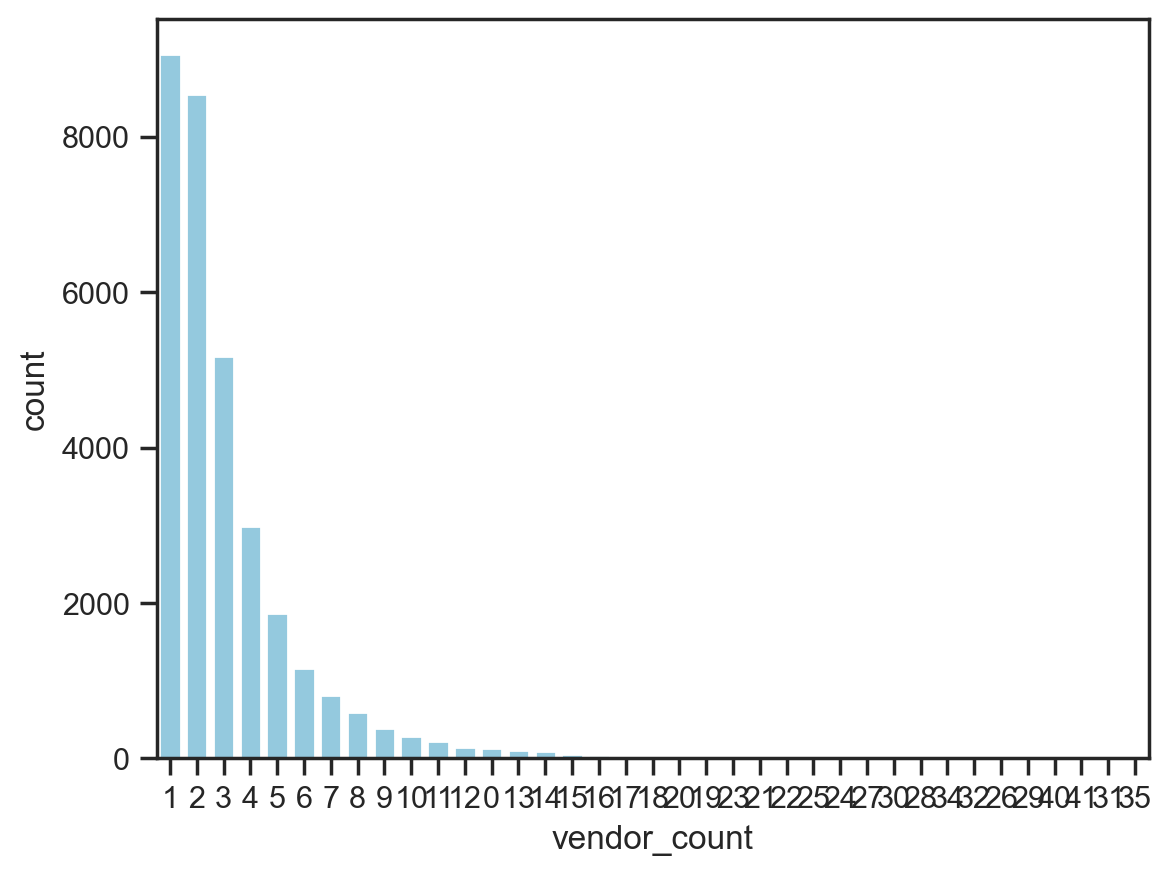

In [40]:
#### NEED TO IMPROVE THIS VISUAL #####
sns.countplot(x=df['vendor_count'], color='skyblue',
              order=df['vendor_count'].value_counts(ascending=False).index
             )
plt.show()

- 138 customers have vendor count equal to 0 
- over 50% of customers have 2 or less `vendor_count`

## `product_count`

In [41]:
df['product_count'].unique()

array([  5,   2,   3,   4,   6,  10,   8,  17,   7,  26,   9,  32,  15,
        13,  16,  28,  19,  12,  18,  11,  25,  14,  23,  29,  21,  31,
        95,  24,  64,  27,  37,  49,  22,  41,  51,  34,  39,  20,  30,
        47,  40,  53,  38,  54,  35,  33,  56,  65,  45,  63,  36,  79,
        48,  70,  44,  84,  46,  66,  57,  58,  83, 110, 117, 269,  75,
        55,  42,  81,  91,  43,  69,  67,  72,  59,   1,   0,  77,  97,
        87,  73,  76,  60, 109,  52,  62,  94,  80,  89,  61,  82,  50,
        88,  68], dtype=int64)

In [42]:
zero_product_count = df[df['product_count'] == 0].shape[0]

print(f"Number of people with product_count equal to 0: {zero_product_count} ({zero_product_count/len(df['product_count']) * 100}%)")

Number of people with product_count equal to 0: 156 (0.4894117647058823%)


In [43]:
small_product_count = df[df['product_count'] < 4].shape[0]

print(f"Number of people with product_count less than 4: {small_product_count} ({small_product_count/len(df['product_count']) * 100}%)")

Number of people with product_count less than 4: 16098 (50.5035294117647%)


- We have 156 people who have `product_count` equal to 0
- Half of the customers ordered less than 4 `product_count`
- The visual doesn't look good since there is big dispersion in `product_count` but most people are on the lower end of the spectrum

## `is_chain`

In [44]:
df['is_chain'].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80], dtype=int64)

In [45]:
zero_chain_count = df[df['is_chain'] == 0].shape[0]

print(f"Number of people with chain_count equal to 0: {zero_chain_count} ({zero_chain_count/len(df['is_chain']) * 100}%)")

Number of people with chain_count equal to 0: 6099 (19.134117647058822%)


- 19% of people have never ordered from chain
- This time 0s can be true values
- Chains account for over 80% of all orders

## `first_order`

In [46]:
df['first_order'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91], dtype=int64)

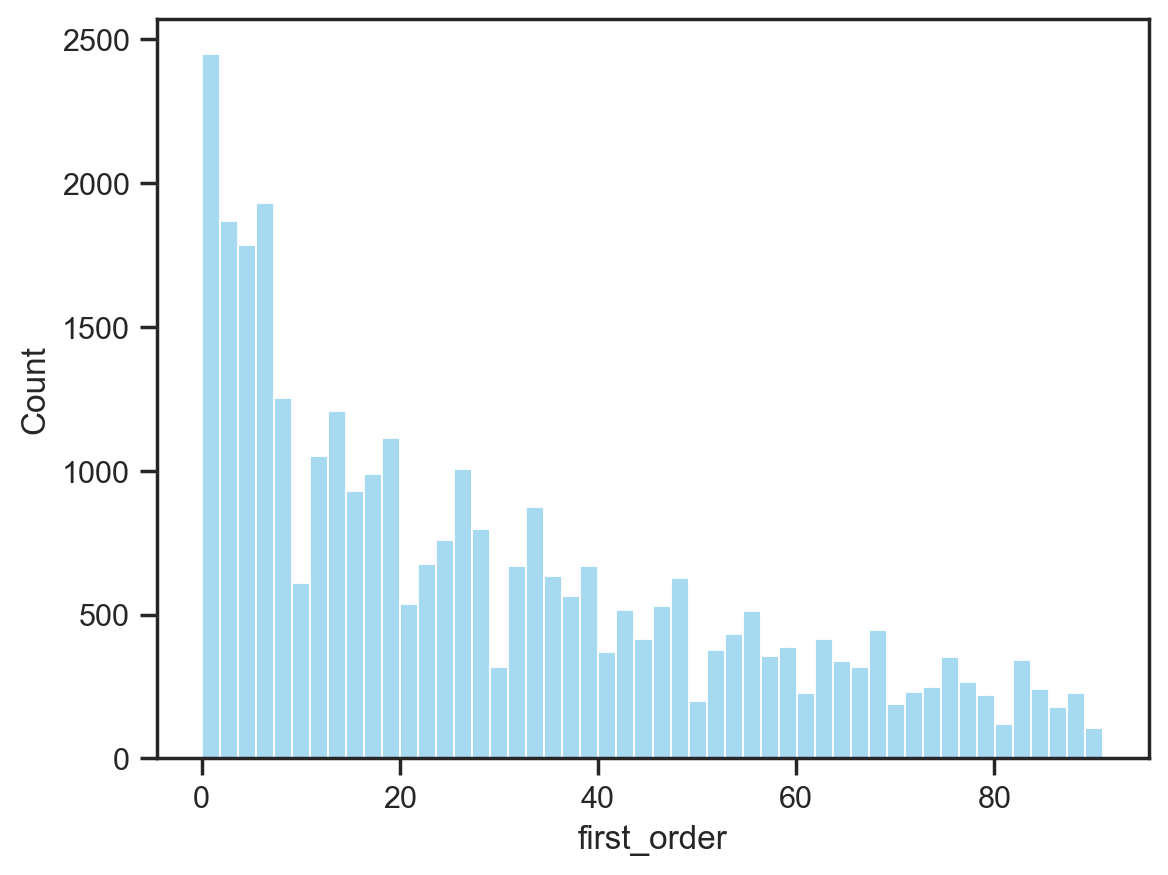

In [47]:
sns.histplot(df["first_order"], bins=50, color='skyblue') 
plt.show()

- No weird values. All of them are within 0-90 timeframe
- Many of `first_order` happend in the early days of our data set
- The pattern indicates people order more on certain days

## `last_order`

In [48]:
df['last_order'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90,  9, 15,  0], dtype=int64)

In [49]:
# there should not be 0 in last_order, it is due to the same reason for the missing values on first_order 
print(df[df['last_order']  == 0]['first_order'].value_counts()) # the zeros appear on the day of the dataset snapshot

first_order
91    106
Name: count, dtype: int64


In [50]:
# we should just add 1 to the max of last_order for the rows that appear zero
df.loc[df['last_order'] == 0] = 91

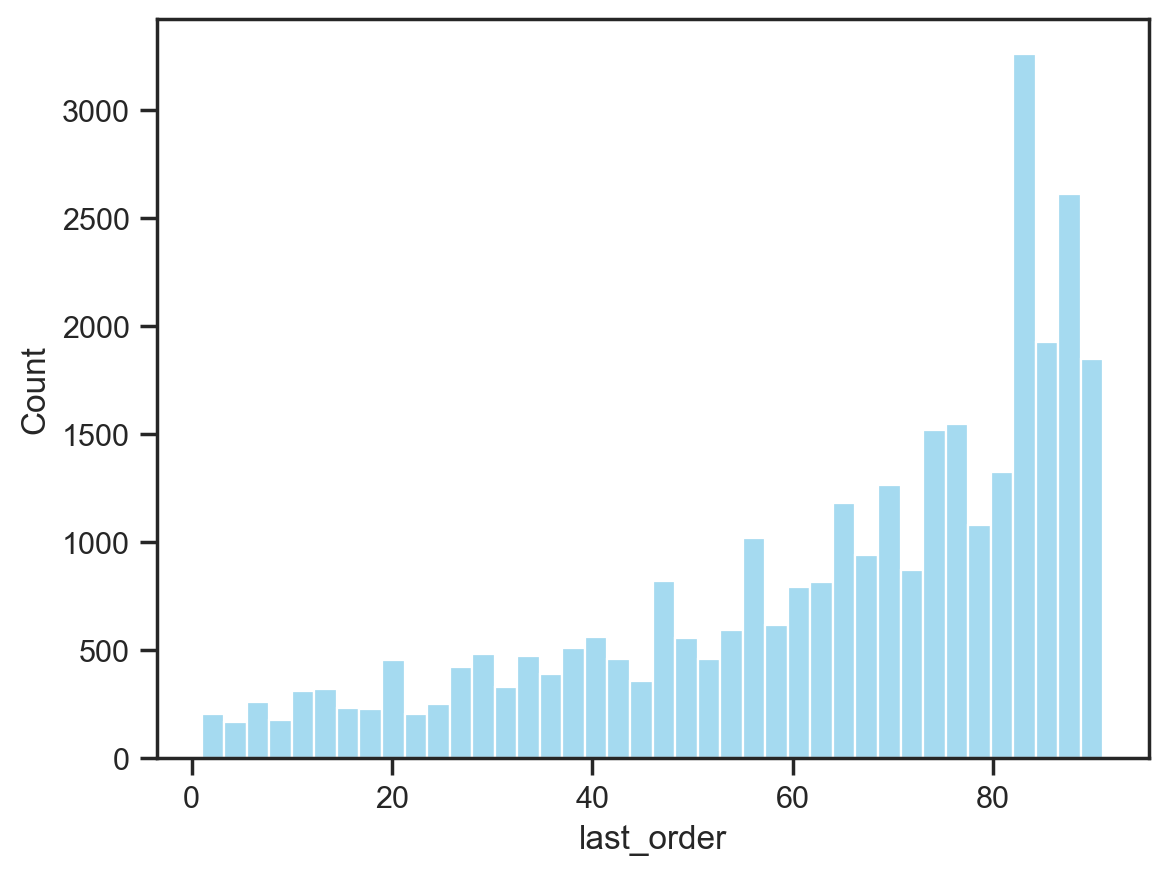

In [51]:
sns.histplot(df["last_order"], bins=40, color='skyblue')  
plt.show()

- No weird values. All of them are within 0-90 timeframe
- Majority of `last_order` happened 'more recently'
- It means that many customers ordered recently
- We can see the peaks and troughs.
- This reapetable pattern most likely indicates that on certain days (weekends?) people order more often

## `last_promo`

In [52]:
df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE', 91], dtype=object)

In [53]:
df['last_promo'].value_counts(normalize=True)

last_promo
-           0.524173
DELIVERY    0.195922
DISCOUNT    0.140361
FREEBIE     0.136220
91          0.003325
Name: proportion, dtype: float64

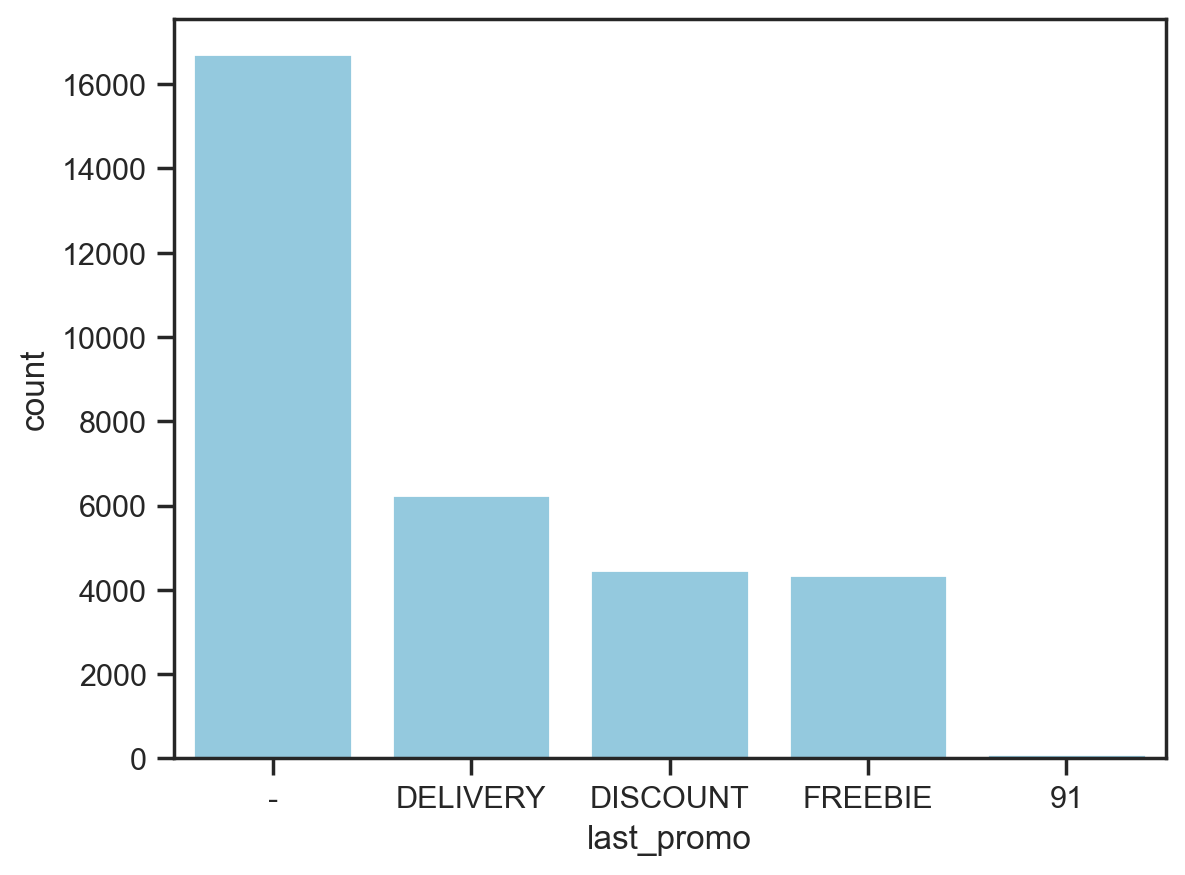

In [54]:
sns.countplot(x=df['last_promo'], color='skyblue',
              order=df['last_promo'].value_counts(ascending=False).index
             )
plt.show()

- No strange values
- Over 50% of our customers didn't use a promo code with their last order

## `payment_method`

In [55]:
df['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD', 91], dtype=object)

In [56]:
df['payment_method'].value_counts(normalize=True)

payment_method
CARD    0.630871
DIGI    0.190557
CASH    0.175247
91      0.003325
Name: proportion, dtype: float64

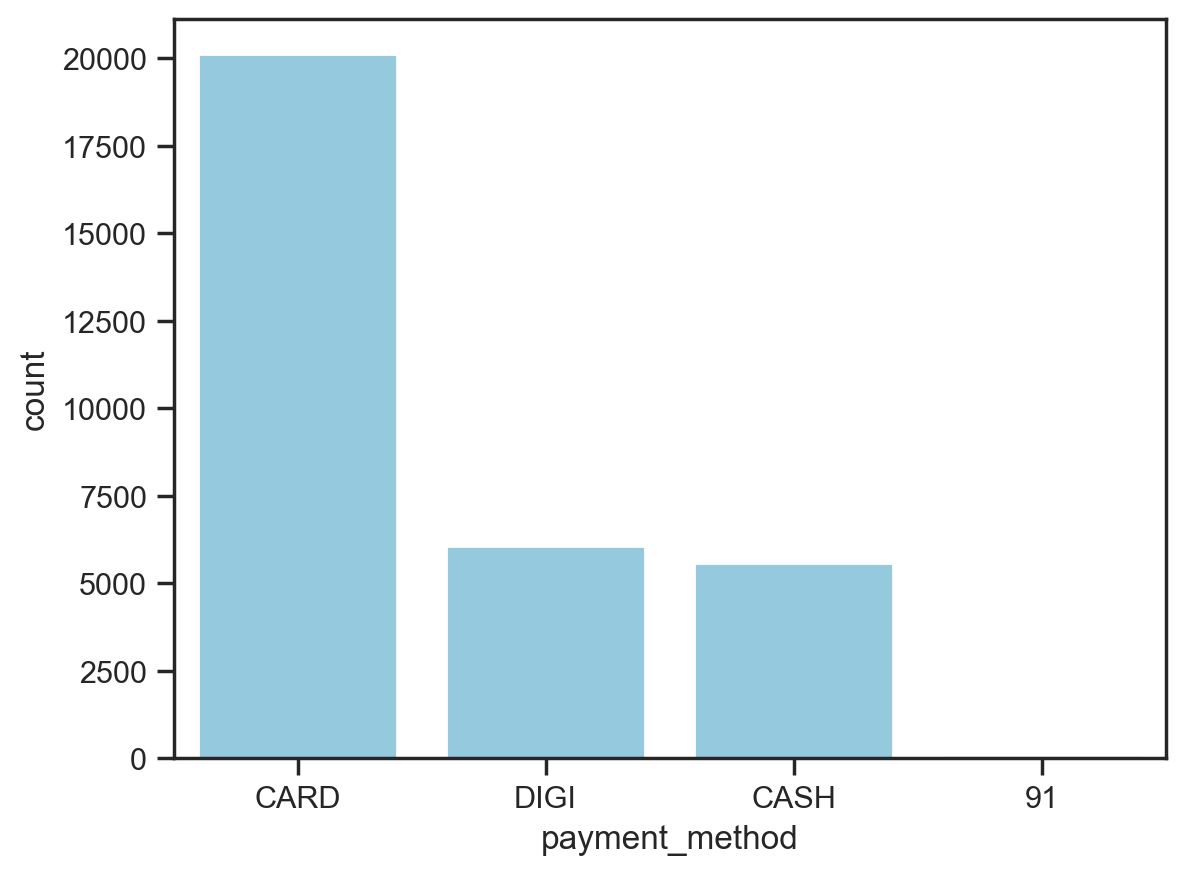

In [57]:
sns.countplot(x=df['payment_method'], color='skyblue',
              order=df['payment_method'].value_counts(ascending=False).index
             )
plt.show()

- Again, no strange values here
- 63% of customers choose to pay with card

## `CUI_American`, `CUI_Beverages`, `CUI_Cafe`, `CUI_Chicken_Dishes`, `CUI_Chinese`, `CUI_Desserts`, `CUI_Healthy`, `CUI_Indian`, `CUI_Italian`, `CUI_Japanese`, `CUI_Noodle_Dishes`, `CUI_OTHER`, `CUI_Street_Food/Snacks`, `CUI_Thai`

In [58]:
df['CUI_American'].describe()

count    31875.000000
mean         5.171914
std         12.652927
min          0.000000
25%          0.000000
50%          0.000000
75%          5.770000
max        280.210000
Name: CUI_American, dtype: float64

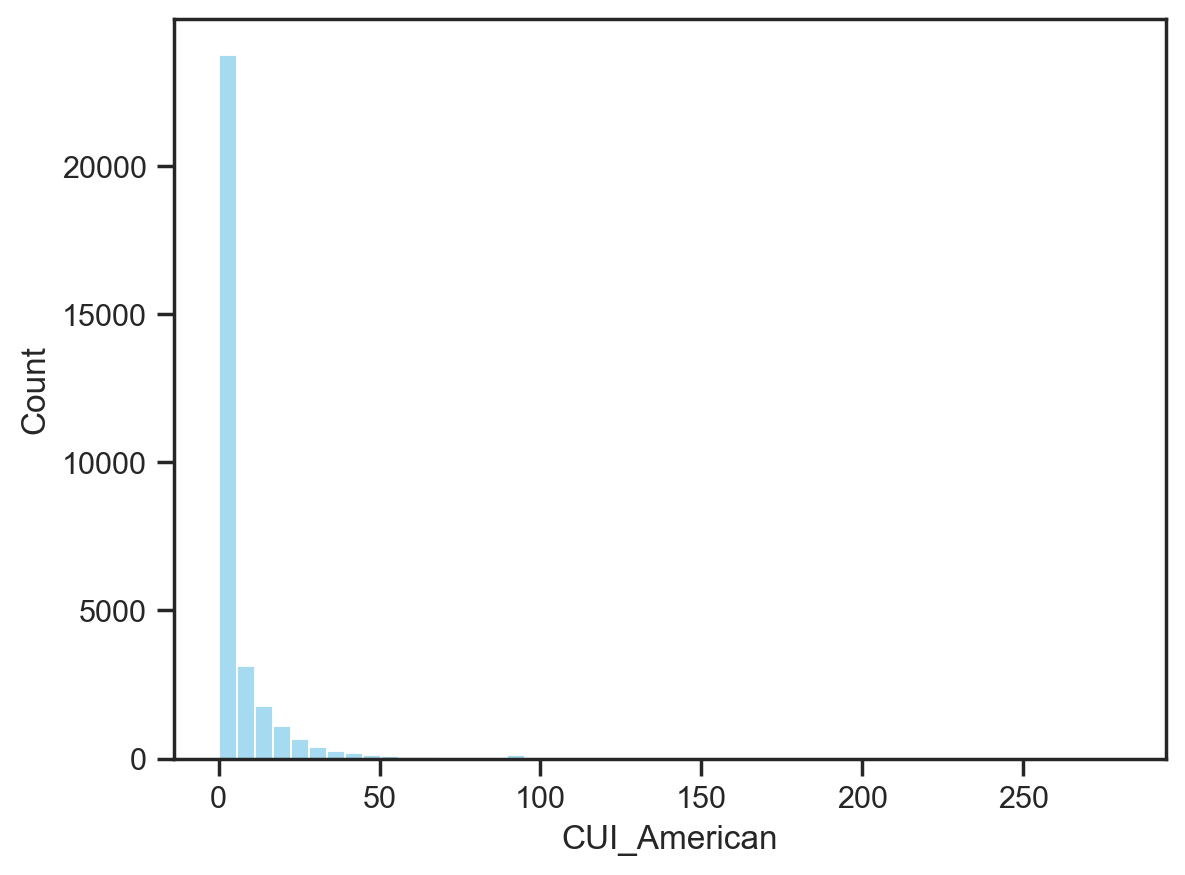

In [59]:
sns.histplot(df["CUI_American"], bins=50, color='skyblue')  
plt.show()

In [60]:
df['CUI_Beverages'].describe()

count    31875.000000
mean         2.596928
std          9.890464
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        229.220000
Name: CUI_Beverages, dtype: float64

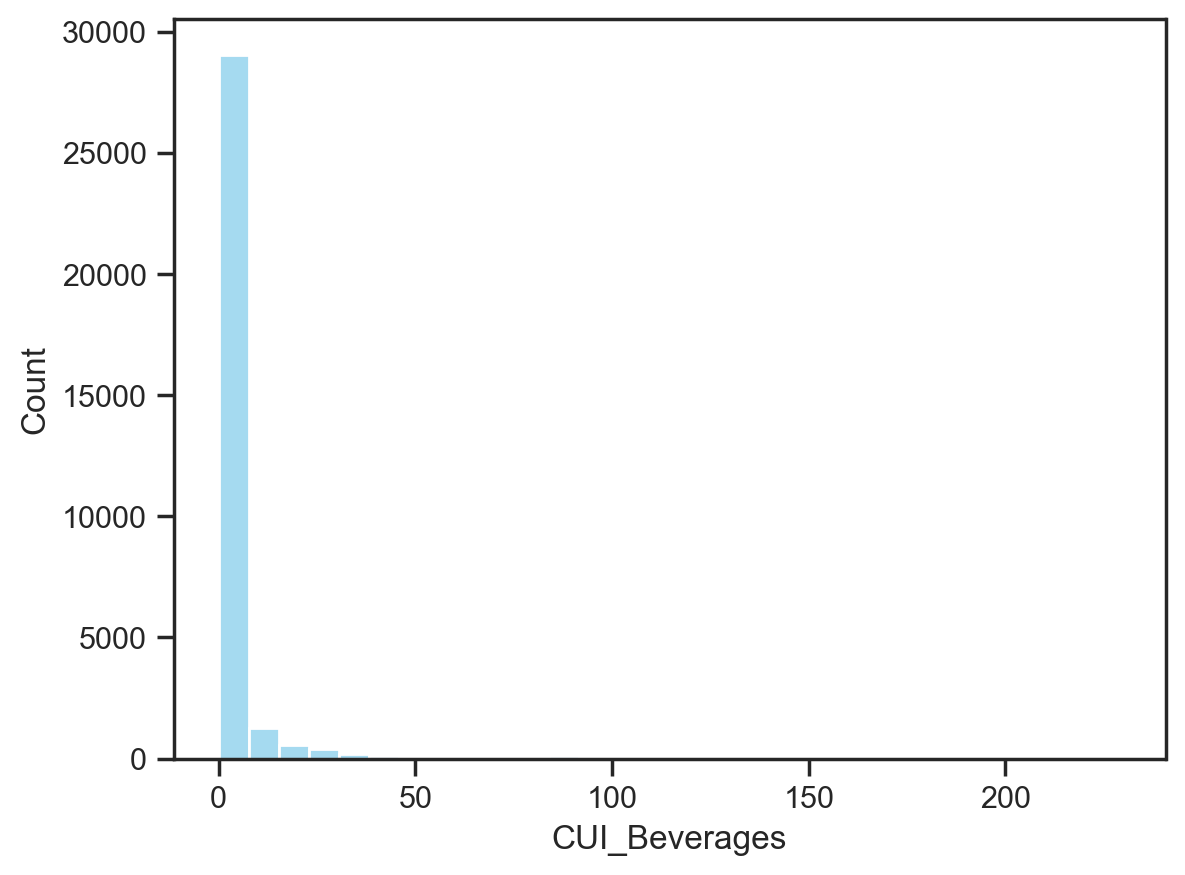

In [61]:
sns.histplot(df["CUI_Beverages"], bins=30, color='skyblue')  
plt.show()

In [62]:
df['CUI_Cafe'].describe()

count    31875.000000
mean         1.104109
std          8.263605
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        326.100000
Name: CUI_Cafe, dtype: float64

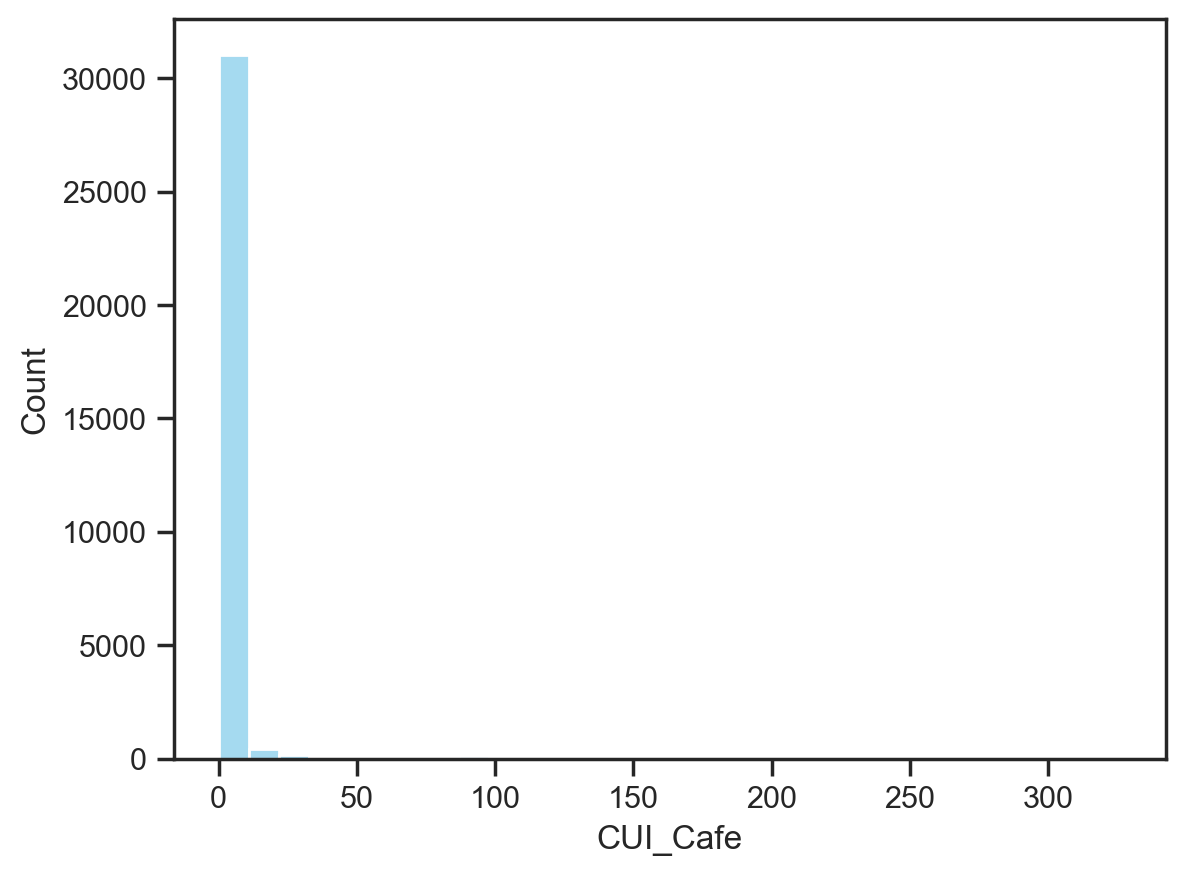

In [63]:
sns.histplot(df["CUI_Cafe"], bins=30, color='skyblue')  
plt.show()

In [64]:
df['CUI_Chicken_Dishes'].describe()

count    31875.000000
mean         1.070317
std          6.352858
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        219.660000
Name: CUI_Chicken_Dishes, dtype: float64

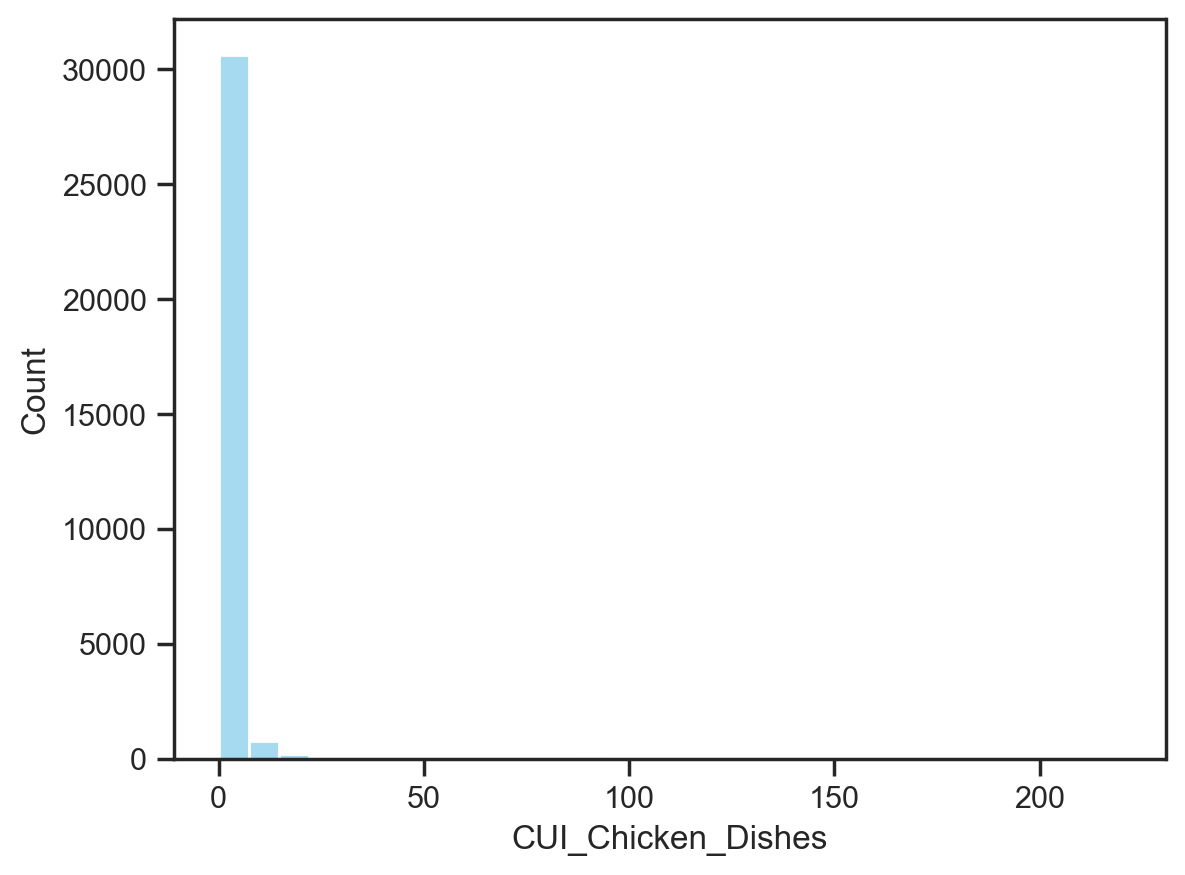

In [65]:
sns.histplot(df["CUI_Chicken_Dishes"], bins=30, color='skyblue')  
plt.show()

In [66]:
df['CUI_Chinese'].describe()

count    31875.000000
mean         1.733047
std          9.679540
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        739.730000
Name: CUI_Chinese, dtype: float64

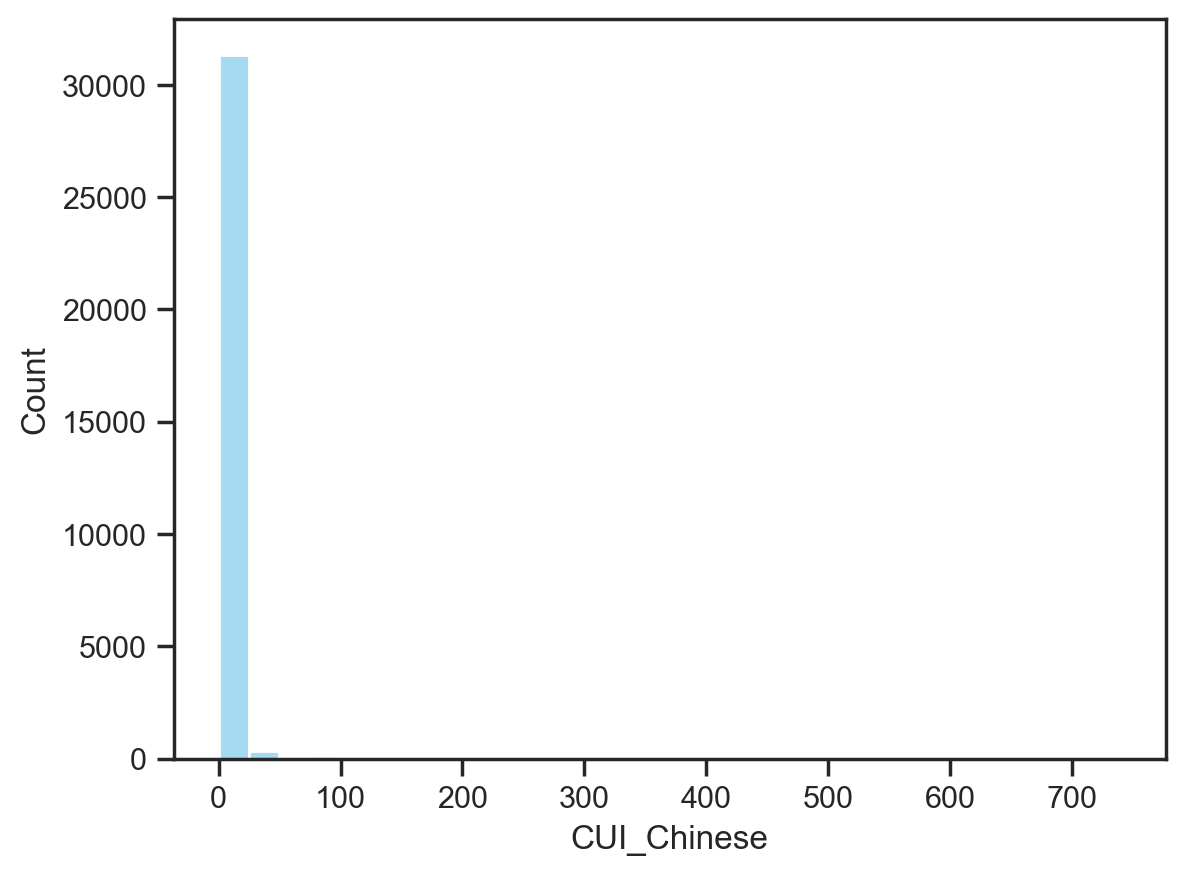

In [67]:
sns.histplot(df["CUI_Chinese"], bins=30, color='skyblue')  
plt.show()

In [68]:
df['CUI_Desserts'].describe()

count    31875.000000
mean         1.185652
std          7.386541
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        230.070000
Name: CUI_Desserts, dtype: float64

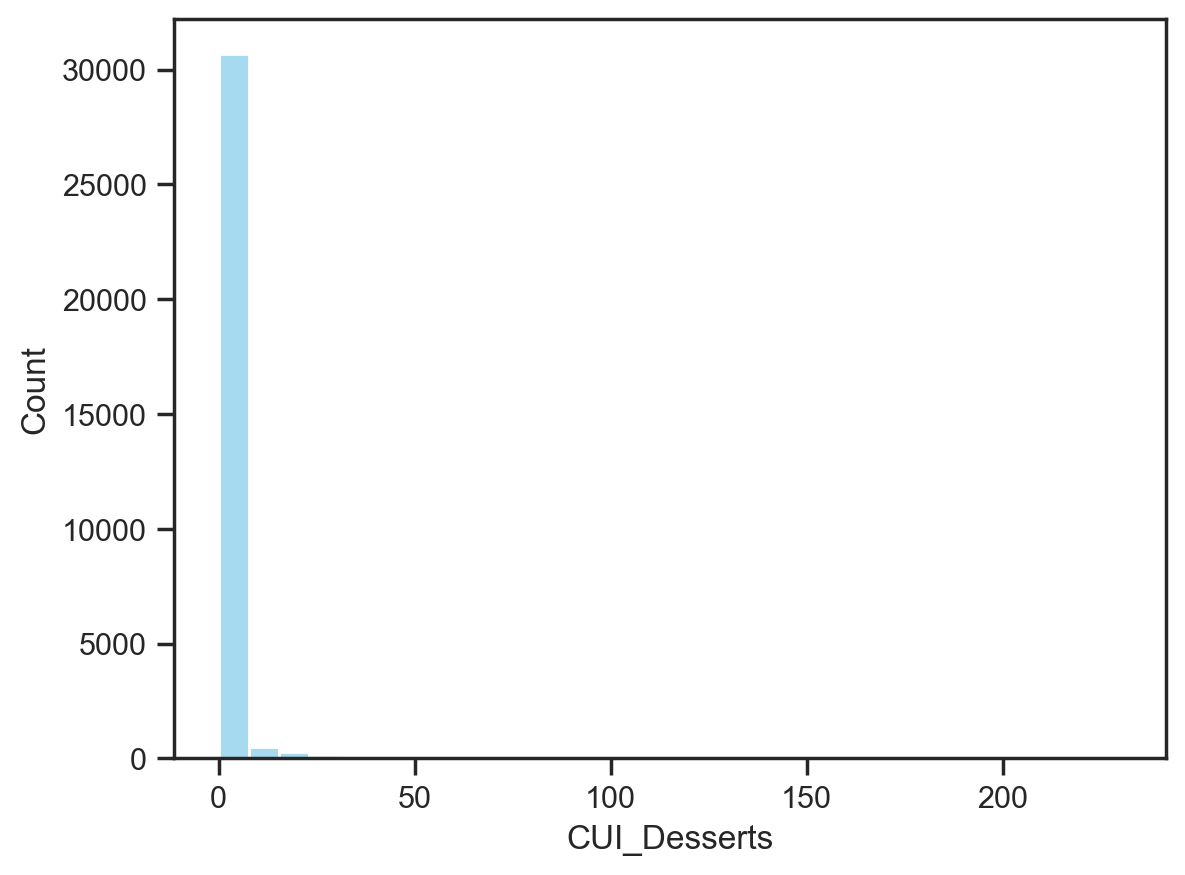

In [69]:
sns.histplot(df["CUI_Desserts"], bins=30, color='skyblue')  
plt.show()

In [70]:
df['CUI_Healthy'].describe()

count    31875.000000
mean         1.252443
std          7.801586
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        255.810000
Name: CUI_Healthy, dtype: float64

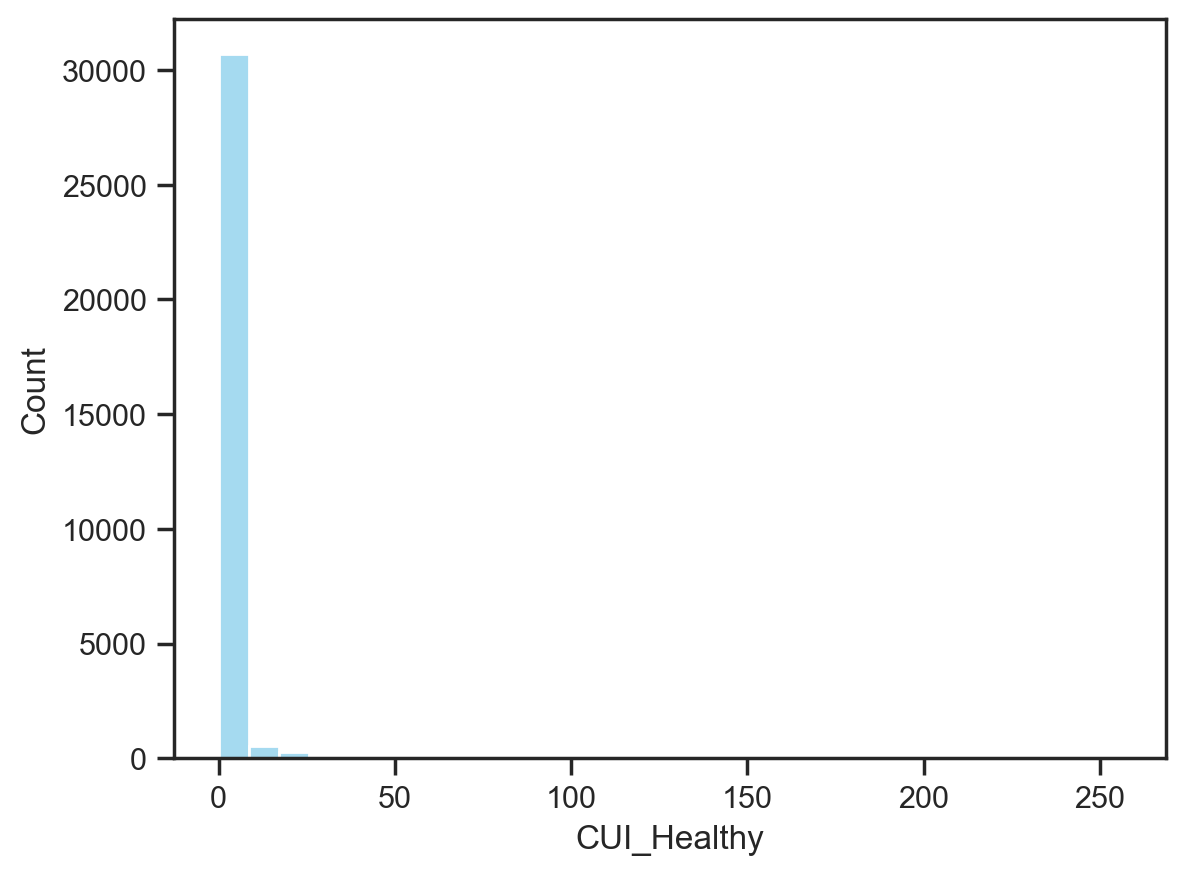

In [71]:
sns.histplot(df["CUI_Healthy"], bins=30, color='skyblue')  
plt.show()

In [72]:
df['CUI_Indian'].describe()

count    31875.000000
mean         1.932742
std          9.048198
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        309.070000
Name: CUI_Indian, dtype: float64

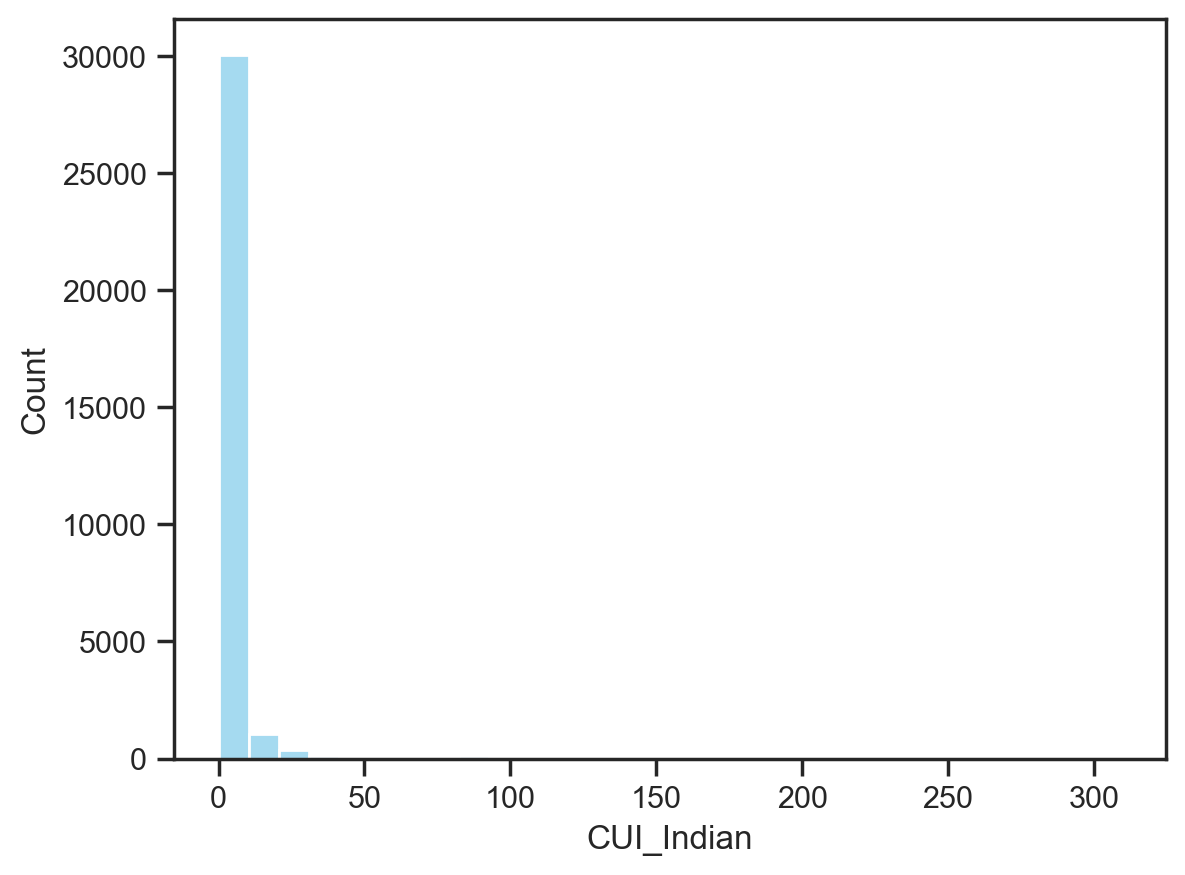

In [73]:
sns.histplot(df["CUI_Indian"], bins=30, color='skyblue')  
plt.show()

In [74]:
df['CUI_Italian'].describe()

count    31875.000000
mean         3.534433
std         12.330078
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        468.330000
Name: CUI_Italian, dtype: float64

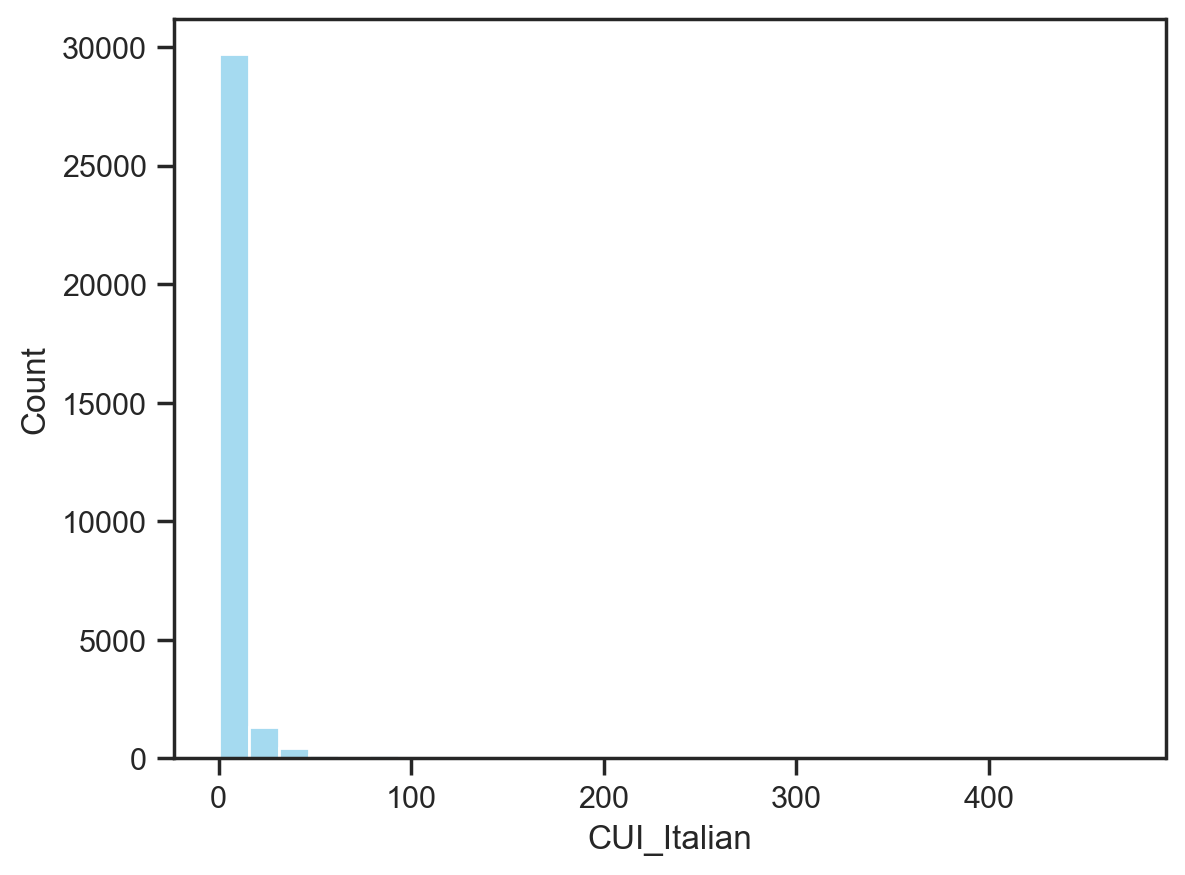

In [75]:
sns.histplot(df["CUI_Italian"], bins=30, color='skyblue')  
plt.show()

In [76]:
df['CUI_Japanese'].describe()

count    31875.000000
mean         3.295155
std         11.369758
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        706.140000
Name: CUI_Japanese, dtype: float64

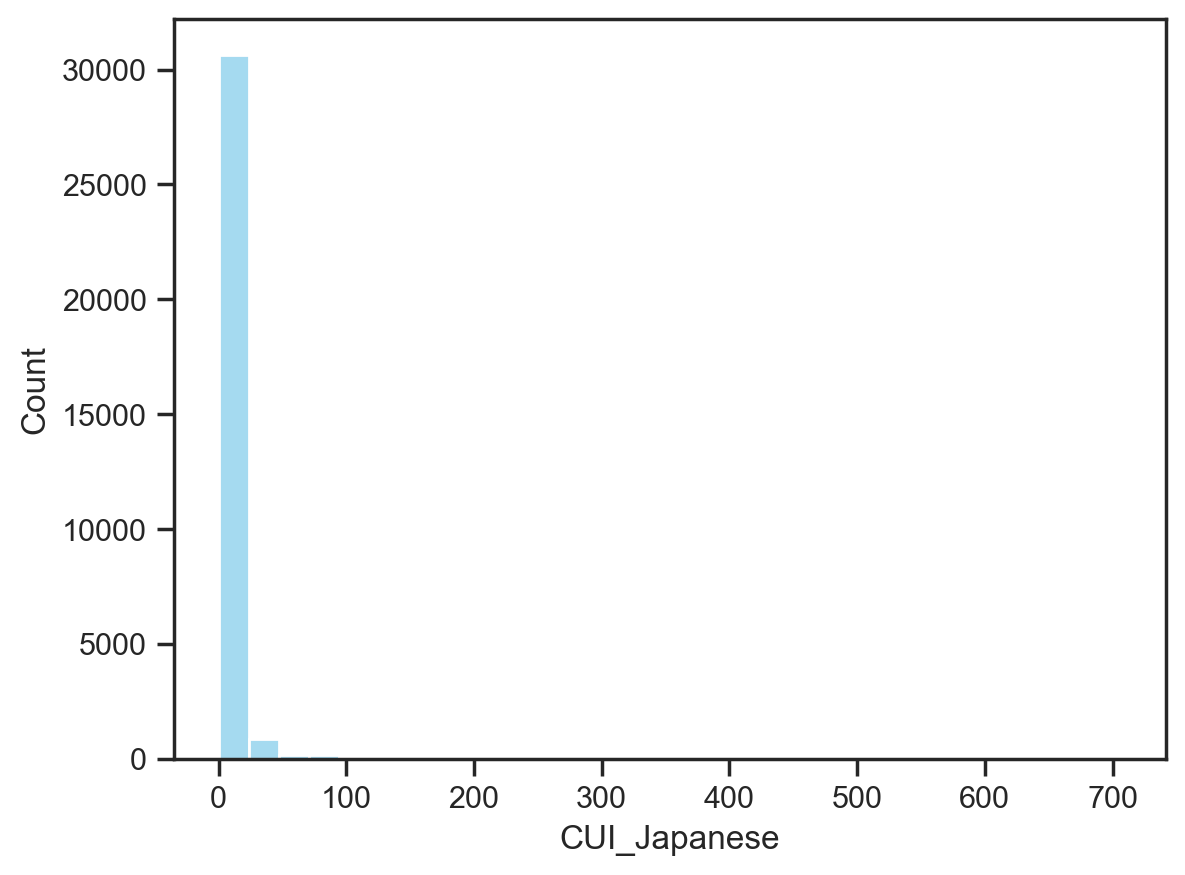

In [77]:
sns.histplot(df["CUI_Japanese"], bins=30, color='skyblue')  
plt.show()

In [78]:
df['CUI_Noodle_Dishes'].describe()

count    31875.000000
mean         1.014248
std          6.899522
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.110000
Name: CUI_Noodle_Dishes, dtype: float64

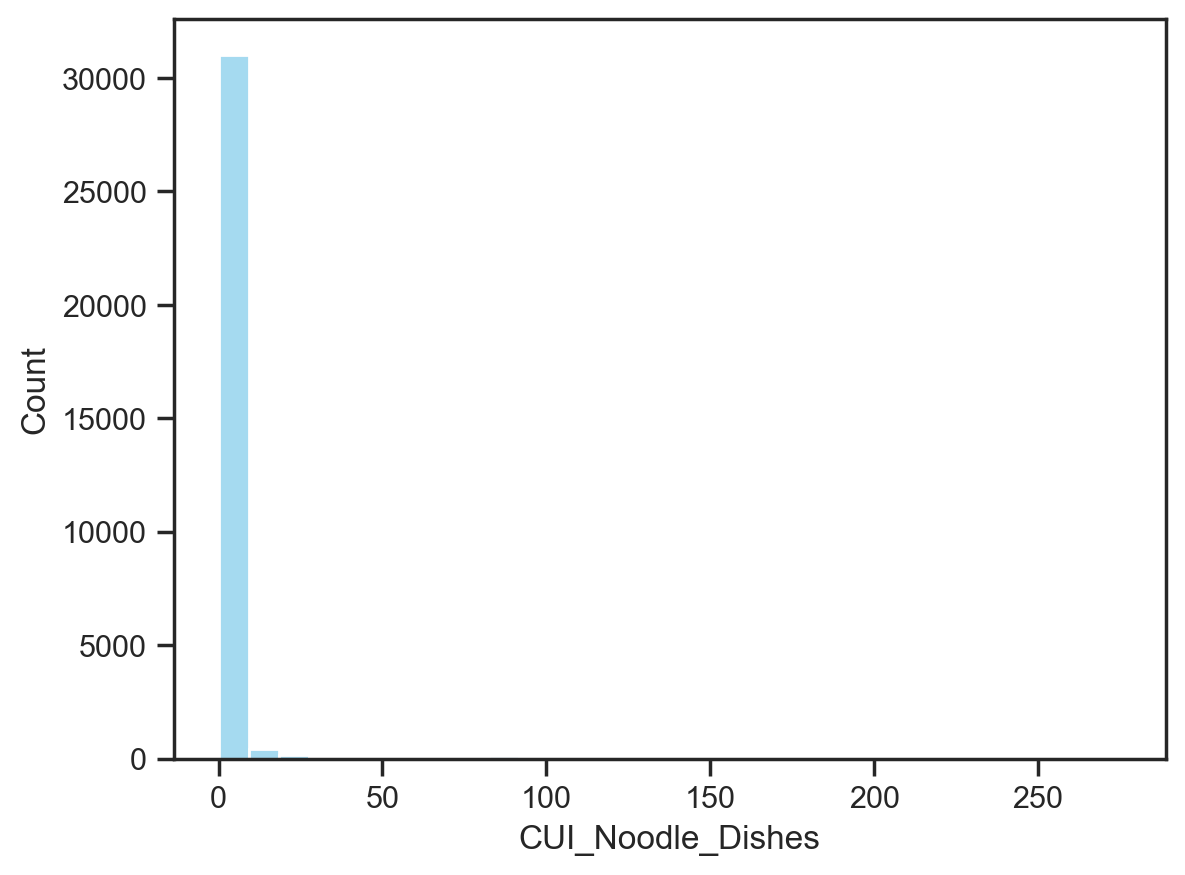

In [79]:
sns.histplot(df["CUI_Noodle_Dishes"], bins=30, color='skyblue')  
plt.show()

In [80]:
df['CUI_OTHER'].describe()

count    31875.000000
mean         3.300658
std         11.002818
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        366.080000
Name: CUI_OTHER, dtype: float64

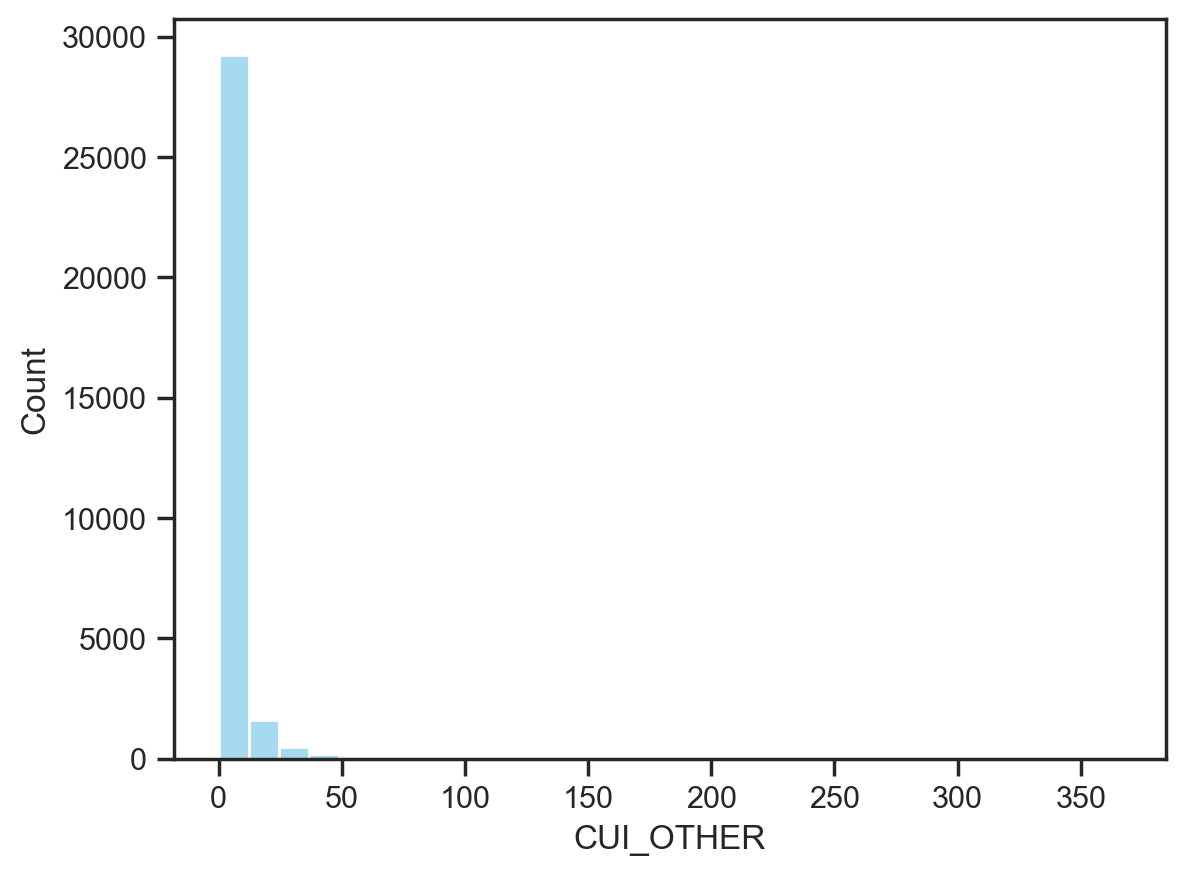

In [81]:
sns.histplot(df["CUI_OTHER"], bins=30, color='skyblue')  
plt.show()

In [82]:
df['CUI_Street_Food/Snacks'].describe()

count    31875.000000
mean         4.204730
std         16.326609
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        454.450000
Name: CUI_Street_Food/Snacks, dtype: float64

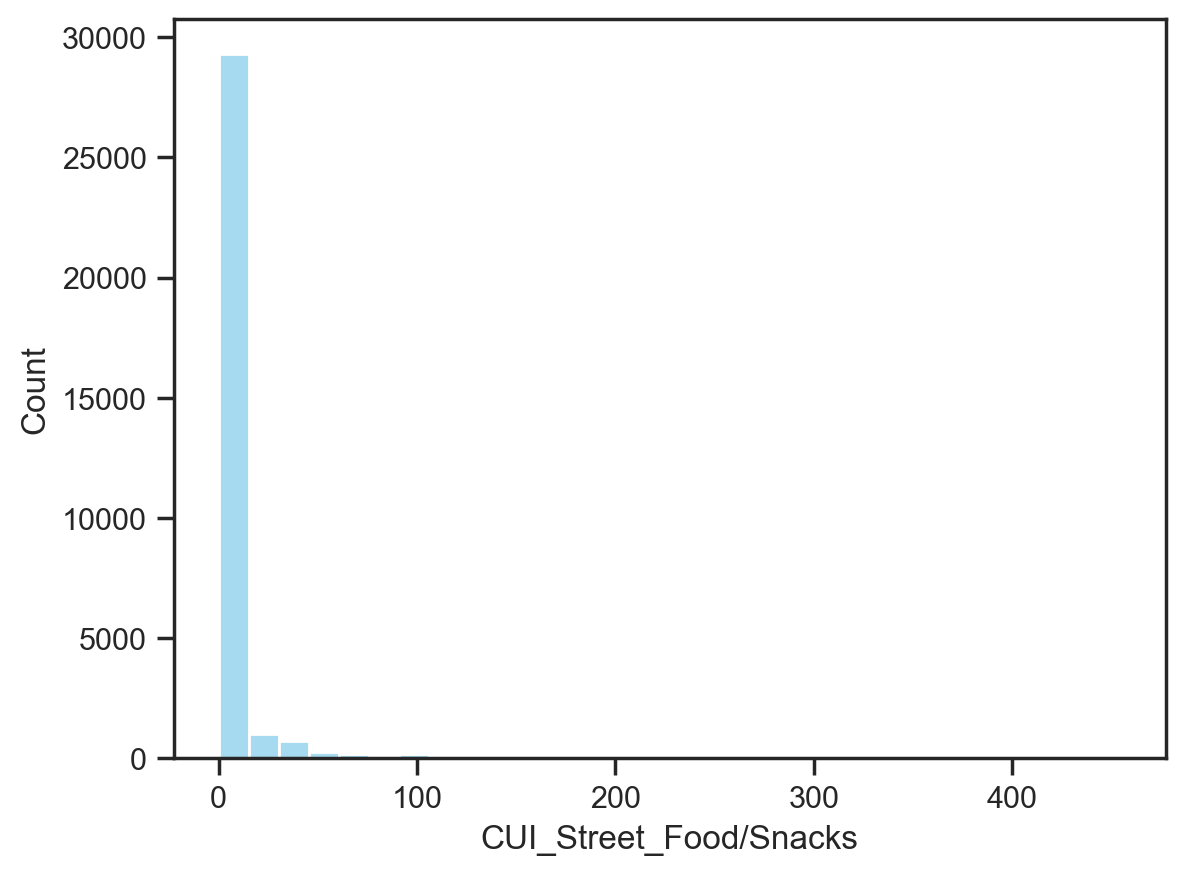

In [83]:
sns.histplot(df["CUI_Street_Food/Snacks"], bins=30, color='skyblue')  
plt.show()

In [84]:
df['CUI_Thai'].describe()

count    31875.000000
mean         1.143901
std          6.826003
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        136.380000
Name: CUI_Thai, dtype: float64

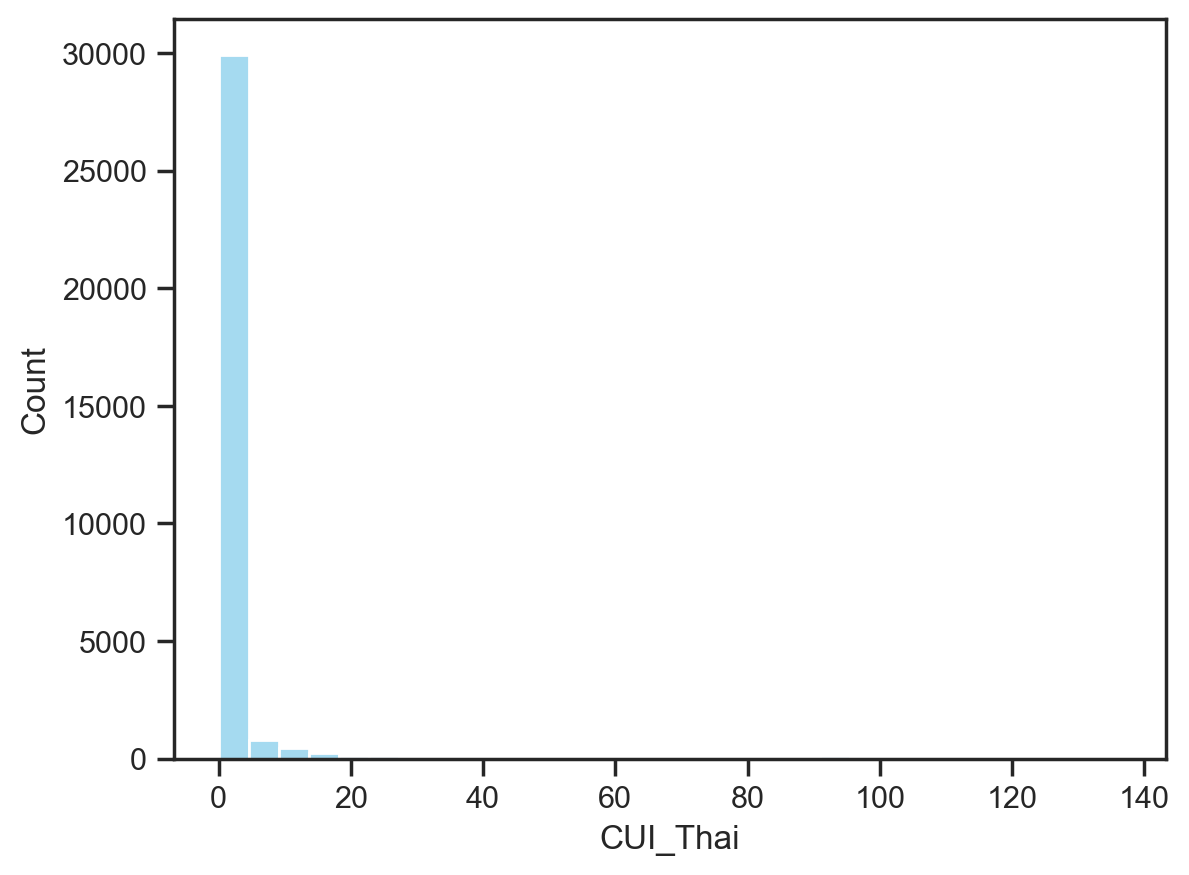

In [85]:
sns.histplot(df["CUI_Thai"], bins=30, color='skyblue')  
plt.show()

## `DOW_0`, `DOW_1`,`DOW_2`,`DOW_3`,`DOW_4`,`DOW_5`,`DOW_6`

In [86]:
df['DOW_0'].describe()

count    31875.000000
mean         0.858541
std          5.304587
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: DOW_0, dtype: float64

In [87]:
plt.hist(df['DOW_0'], bins=5, color='skyblue', range =(0,5))  
plt.show()

In [88]:
df['DOW_1'].describe()

count    31875.000000
mean         0.870180
std          5.309847
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: DOW_1, dtype: float64

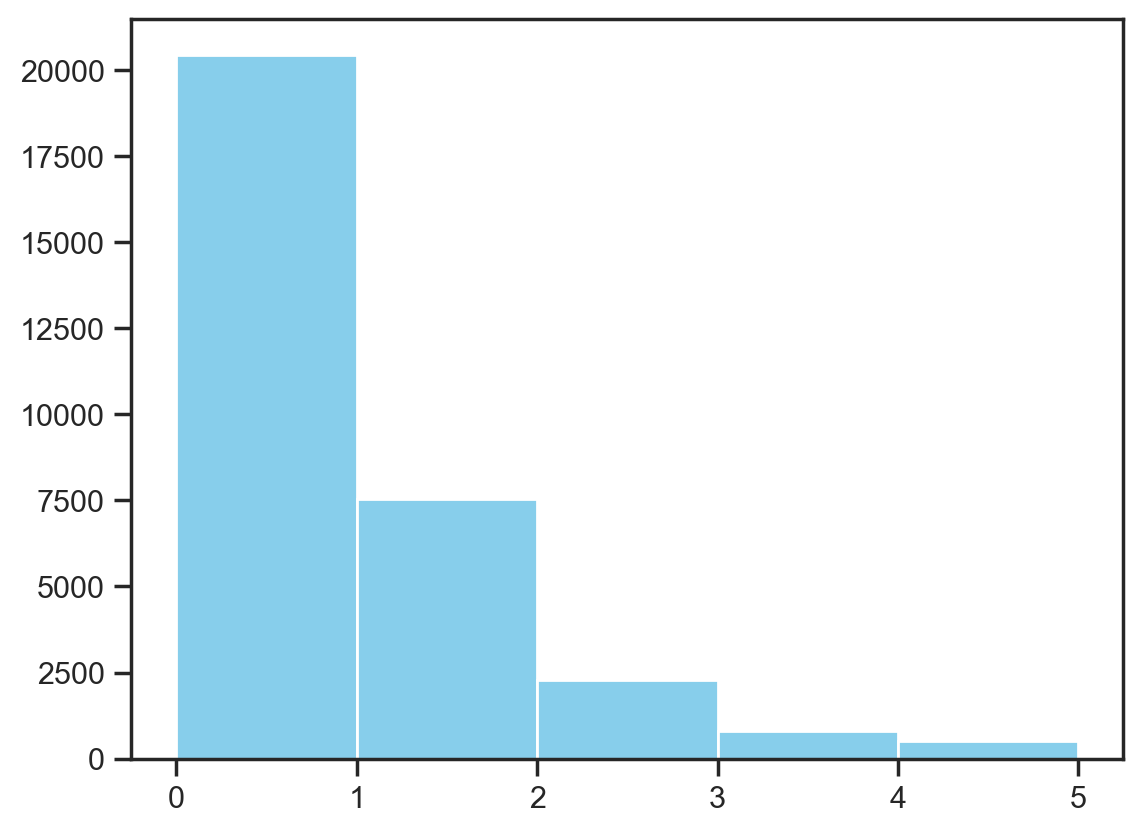

In [89]:
plt.hist(df['DOW_1'], bins=5, color='skyblue', range =(0,5))  
plt.show()

In [90]:
df['DOW_2'].describe()

count    31875.000000
mean         0.893553
std          5.308852
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: DOW_2, dtype: float64

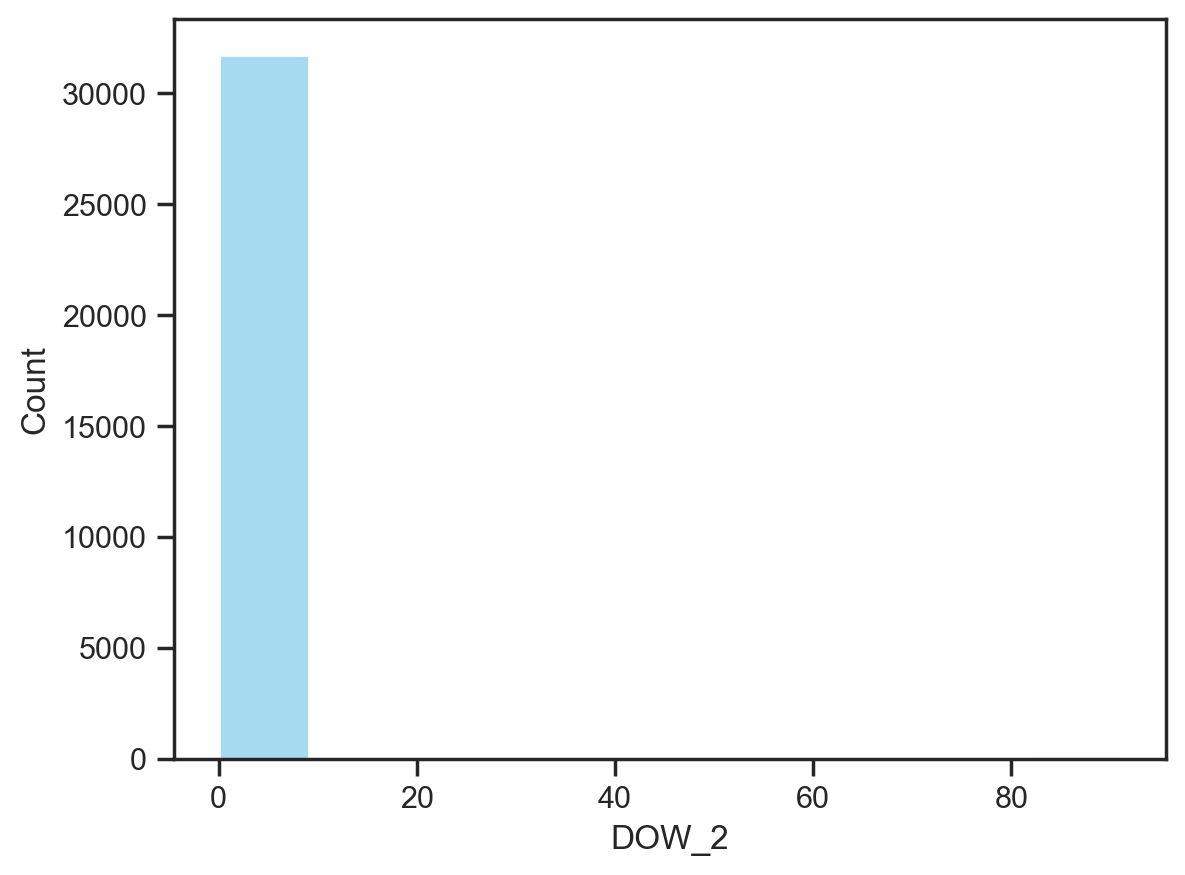

In [91]:
sns.histplot(df['DOW_2'], bins=10, color='skyblue')  
plt.show()

In [92]:
df['DOW_3'].describe()

count    31875.000000
mean         0.922008
std          5.311942
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: DOW_3, dtype: float64

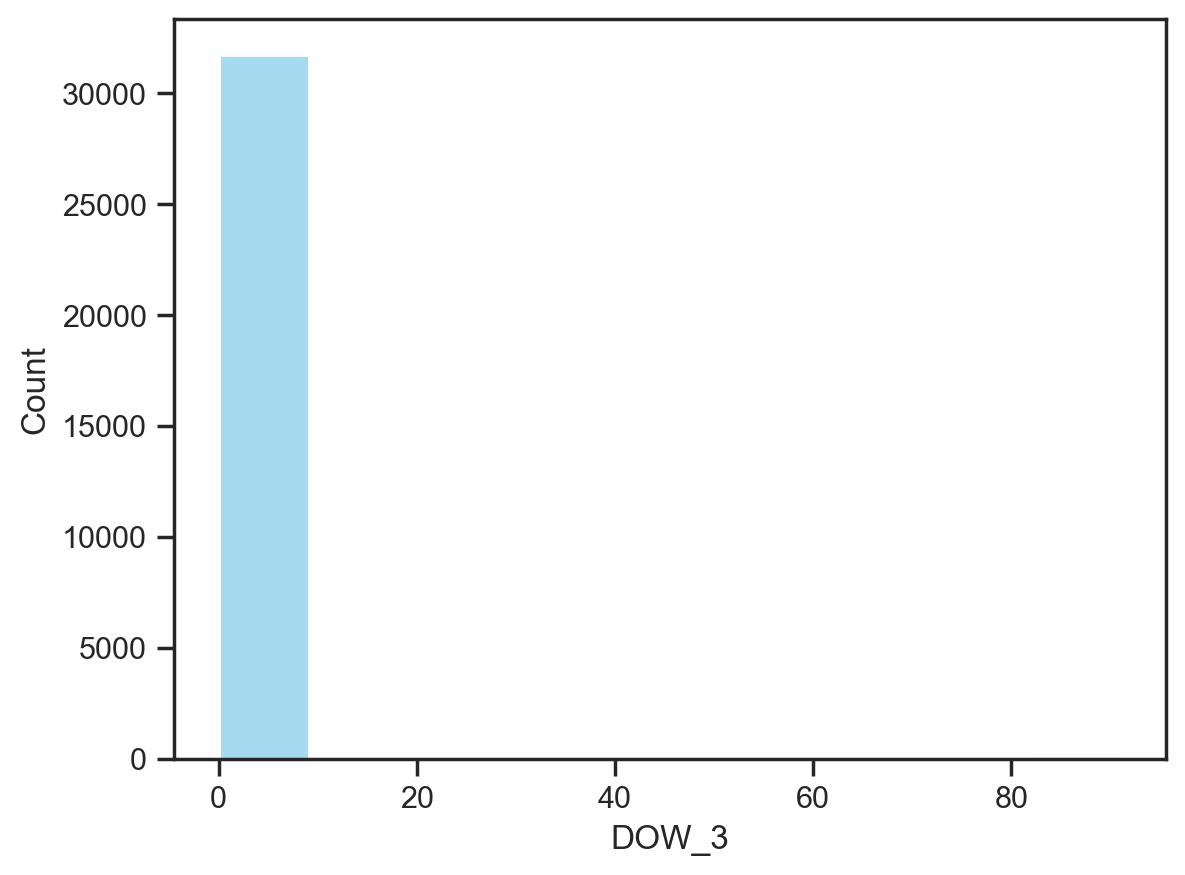

In [93]:
sns.histplot(df['DOW_3'], bins=10, color='skyblue')  
plt.show()

In [94]:
df['DOW_4'].describe()

count    31875.000000
mean         0.980486
std          5.312414
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: DOW_4, dtype: float64

In [95]:
sns.histplot(df['DOW_4'], bins=10, color='skyblue')  
plt.show()

In [96]:
df['DOW_5'].describe()

count    31875.000000
mean         0.955576
std          5.310079
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: DOW_5, dtype: float64

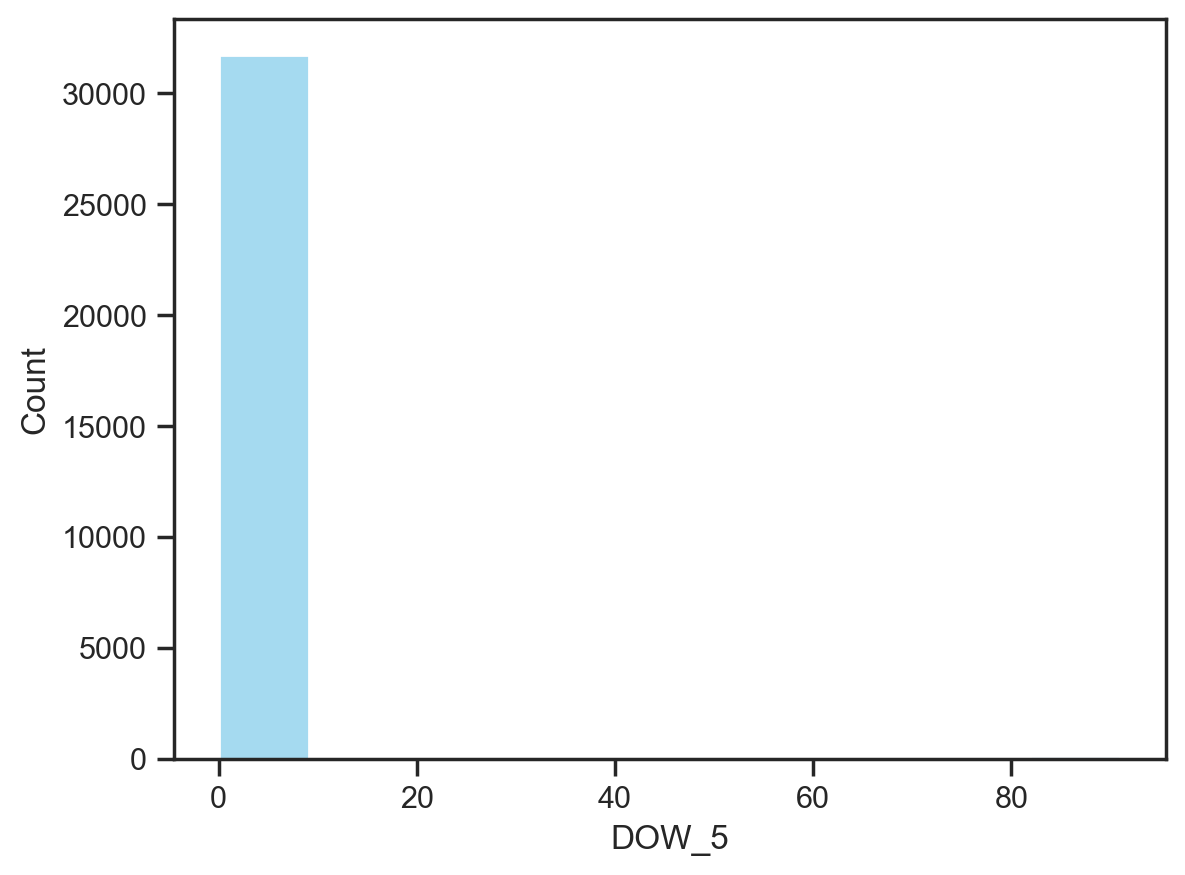

In [97]:
sns.histplot(df['DOW_5'], bins=10, color='skyblue')  
plt.show()

In [98]:
df['DOW_6'].describe()

count    31875.000000
mean         1.003639
std          5.328029
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         91.000000
Name: DOW_6, dtype: float64

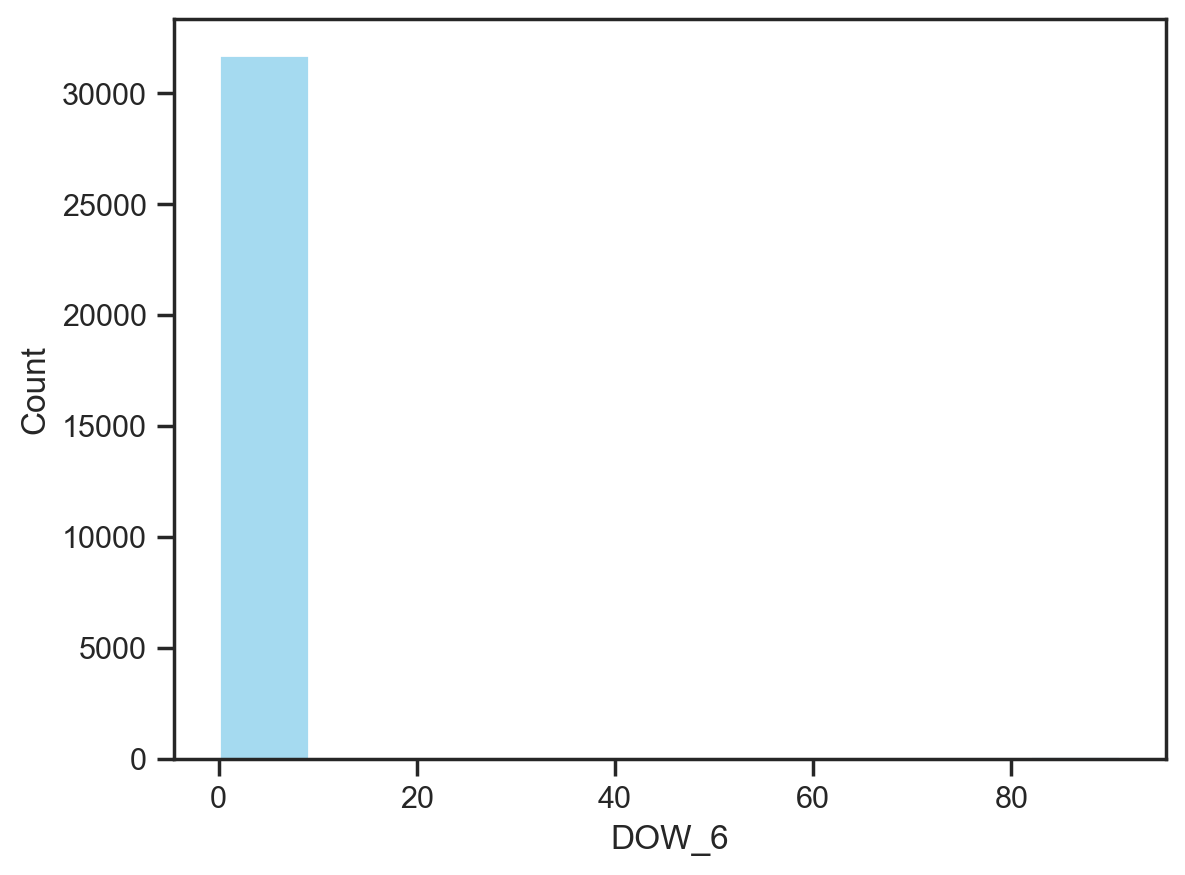

In [99]:
sns.histplot(df['DOW_6'], bins=10, color='skyblue')  
plt.show()

## `HR_0`,`HR_1`,`HR_2`,`HR_3`,`HR_4`,`HR_5`,`HR_6`,`HR_7`,`HR_8`,`HR_9`,`HR_10`,`HR_11`,`HR_12`,`HR_13`,`HR_14`,`HR_15`, `HR_16`,`HR_17`,`HR_18`,`HR_19`,`HR_20`,`HR_21`,`HR_22`,`HR_23`

### `HR_0`

In [100]:
hourly_counts = {}

for hour in range(24):
    column_name = f'HR_{hour}'
    if column_name in df.columns:
        hourly_counts[column_name] = df[column_name].value_counts()

# Combine all hourly counts into a single DataFrame
combined_counts = pd.DataFrame(hourly_counts).fillna(0).astype(int)

# Calculate total counts for each hour
total_counts = combined_counts.sum()

# Add total counts as the first row
combined_counts = pd.concat([pd.DataFrame(total_counts, columns=['Total']).T, combined_counts])

# Sort the remaining rows (excluding the 'Total' row) in descending order
combined_counts.iloc[1:] = combined_counts.iloc[1:].sort_values(
    by=combined_counts.columns.tolist(), ascending=False
)

# Display the combined counts
print(combined_counts)

#check if values are in line with surrounding areas - they are
print(combined_counts.describe().transpose())

        HR_0   HR_1   HR_2   HR_3   HR_4   HR_5   HR_6   HR_7   HR_8   HR_9  \
Total  31875  31875  31875  31875  31875  31875  31875  31875  31875  31875   
0      29753  30488  30281  29250  29403  29747  30024  29878  28818  26856   
1       1485   1014   1171   1781   1820   1611   1414   1539   2292   3547   
2        337    181    219    464    376    303    244    262    439    829   
3        106    106    106    106    106    106    106    106    106    106   
4         91     46     60    163    101     63     59     54    114    280   
5         51     24     14     53     32     28     15     18     44    122   
6         28      7      8     26     18     15      7      5     27     59   
7          9      4      5     16      7      0      3      3     10     26   
8          4      1      1      1      1      0      0      1      2     13   
9          3      1      4      2      3      0      1      3      2      8   
10         3      0      0      2      0      0     

<hr>
<a class="anchor" id="datacategorization">
    
## 5.2 Data Categorization
    
</a>

***Days of The Week***

In [101]:
days_of_week = df[['DOW_0', 'DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']]

***Hours of The Day***

In [102]:
hours_of_day = df[['HR_0','HR_1','HR_2','HR_3','HR_4','HR_5','HR_6','HR_7','HR_8','HR_9','HR_10','HR_11','HR_12','HR_13','HR_14','HR_15',
                   'HR_16','HR_17','HR_18','HR_19','HR_20','HR_21','HR_22','HR_23']]

***Cuisines***

In [103]:
cuisines = df[['CUI_American', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian'
               , 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai']]

***Categorical Variables***

In [104]:
cat_variables = df[['customer_region', 'last_promo', 'payment_method']]

***Metric Variables***

In [105]:
metric_variables = df[['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']]

***All Metric***

In [106]:
#### WHY IS THIS FUCKED UP XD ####
all_metric = metric_variables + cuisines + days_of_week + hours_of_day 
all_metric

CUI_American  CUI_Beverages  CUI_Cafe  CUI_Chicken_Dishes  CUI_Chinese  \
0               NaN            NaN       NaN                 NaN          NaN   
1               NaN            NaN       NaN                 NaN          NaN   
2               NaN            NaN       NaN                 NaN          NaN   
3               NaN            NaN       NaN                 NaN          NaN   
4               NaN            NaN       NaN                 NaN          NaN   
...             ...            ...       ...                 ...          ...   
31883           NaN            NaN       NaN                 NaN          NaN   
31884           NaN            NaN       NaN                 NaN          NaN   
31885           NaN            NaN       NaN                 NaN          NaN   
31886           NaN            NaN       NaN                 NaN          NaN   
31887           NaN            NaN       NaN                 NaN          NaN   

       CUI_Desserts  CUI_Healthy  CUI_Indian  CUI_Italian  CUI_Japanese  ...  \
0               NaN          NaN         NaN          NaN           NaN  ...   
1               NaN          NaN         NaN          NaN           NaN  ...   
2               NaN          NaN         NaN          NaN           NaN  ...   
3               NaN          NaN         NaN          NaN           NaN  ...   
4               NaN          NaN         NaN          NaN           NaN  ...   
...             ...          ...         ...          ...           ...  ...   
31883           NaN          NaN         NaN          NaN           NaN  ...   
31884           NaN          NaN         NaN          NaN           NaN  ...   
31885           NaN          NaN         NaN          NaN           NaN  ...   
31886           NaN          NaN         NaN          NaN           NaN  ...   
31887           NaN          NaN         NaN          NaN           NaN  ...   

       HR_6  HR_7  HR_8  HR_9  customer_age  first_order  is_chain  \
0       NaN   NaN   NaN   NaN           NaN          NaN       NaN   
1       NaN   NaN   NaN   NaN           NaN          NaN       NaN   
2       NaN   NaN   NaN   NaN           NaN          NaN       NaN   
3       NaN   NaN   NaN   NaN           NaN          NaN       NaN   
4       NaN   NaN   NaN   NaN           NaN          NaN       NaN   
...     ...   ...   ...   ...           ...          ...       ...   
31883   NaN   NaN   NaN   NaN           NaN          NaN       NaN   
31884   NaN   NaN   NaN   NaN           NaN          NaN       NaN   
31885   NaN   NaN   NaN   NaN           NaN          NaN       NaN   
31886   NaN   NaN   NaN   NaN           NaN          NaN       NaN   
31887   NaN   NaN   NaN   NaN           NaN          NaN       NaN   

       last_order  product_count  vendor_count  
0             NaN            NaN           NaN  
1             NaN            NaN           NaN  
2             NaN            NaN           NaN  
3             NaN            NaN           NaN  
4             NaN            NaN           NaN  
...           ...            ...           ...  
31883         NaN            NaN           NaN  
31884         NaN            NaN           NaN  
31885         NaN            NaN           NaN  
31886         NaN            NaN           NaN  
31887         NaN            NaN           NaN  

[31875 rows x 51 columns]

<hr>
<a class="anchor" id="newfeature">
    
## 5.3 New Feature Creation
    
</a>

#### Total Orders Per Client

In [107]:
df['Total_Orders_Per_Client'] = Total_Orders_Week

In [108]:
df['Total_Orders_Per_Client'].unique()

array([ 2,  3,  4,  5,  7,  6, 12, 16, 23, 10,  8, 21, 14, 11, 15, 13,  9,
       20, 26, 17, 25, 54, 30, 18, 42, 19, 32, 36, 22, 28, 34, 24, 33, 46,
       39, 27, 47, 37, 58, 41, 38, 63, 31, 69, 44, 35, 52, 57, 82, 90, 94,
       62, 43, 61, 70, 60, 55, 40,  1,  0, 29, 51, 53, 65, 45, 91, 50, 75,
       49, 48, 80, 59], dtype=int64)

In [109]:
df['Total_Orders_Per_Client'].describe()

count    31875.000000
mean         4.369035
std          5.084780
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         94.000000
Name: Total_Orders_Per_Client, dtype: float64

In [110]:
plt.hist(df['Total_Orders_Per_Client'], bins=25, color='skyblue', range = (0,25))  
plt.show()

#### Total Spent Per Client

In [111]:
df['mnt'] = cuisines.sum(axis=1)

In [112]:
df['mnt'].describe()

count    31875.000000
mean        32.540277
std         80.664409
min          0.000000
25%          8.010000
50%         18.110000
75%         35.380000
max       1348.320000
Name: mnt, dtype: float64

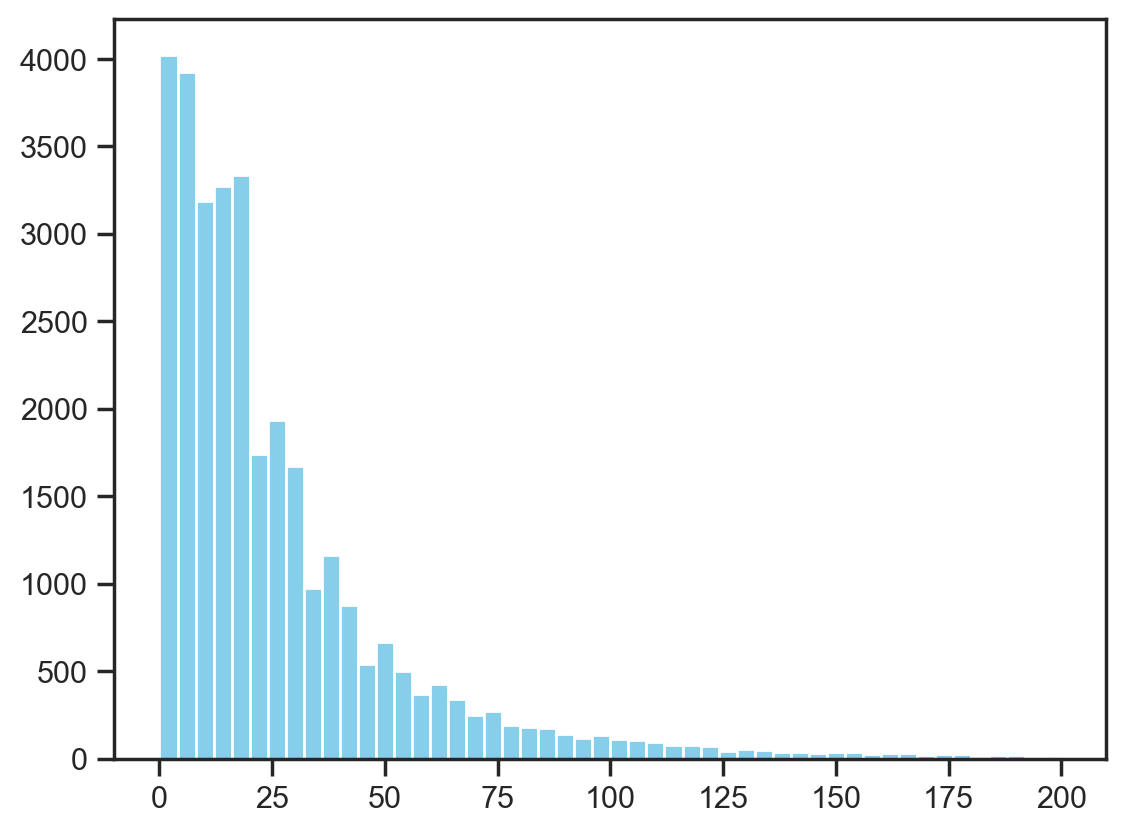

In [113]:
plt.hist(df['mnt'], bins=50, color='skyblue', range = (0, 200))  
plt.show()

#### Amount Spent Per Order

In [114]:
df['mnt_Per_Order'] = (df['mnt']/df['Total_Orders_Per_Client']).round(2)

In [115]:
df['mnt_Per_Order'].describe()

count    31737.000000
mean        11.673130
std         72.901765
min          0.000000
25%          3.200000
50%          5.890000
75%          9.570000
max       1274.000000
Name: mnt_Per_Order, dtype: float64

In [116]:
plt.hist(df['mnt_Per_Order'], bins=50, color='skyblue', range = (0,20))  
plt.show()

#### Amount of Items Per Order

In [117]:
df['Items_Per_Order'] = (df['product_count']/df['Total_Orders_Per_Client'])

In [118]:
df['Items_Per_Order'].describe()

count    31737.000000
mean         1.595727
std          5.155315
min          0.000000
25%          1.000000
50%          1.166667
75%          1.500000
max         91.000000
Name: Items_Per_Order, dtype: float64

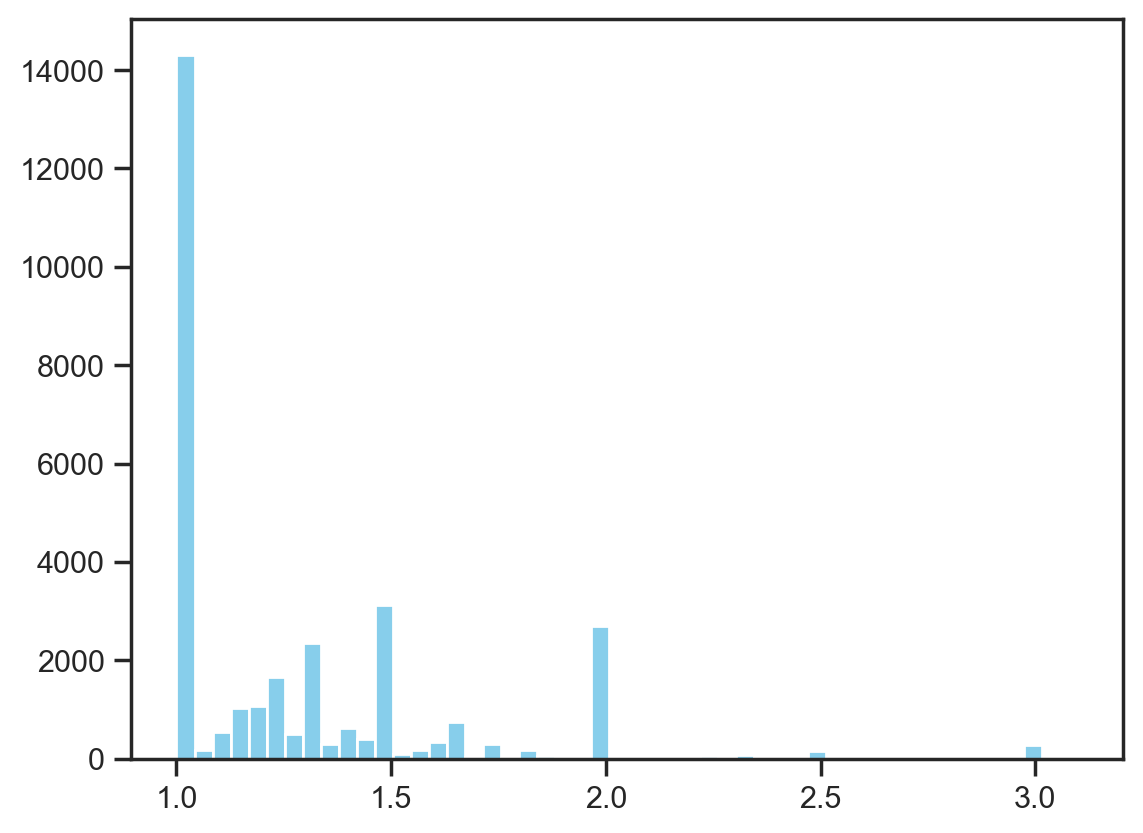

In [119]:
plt.hist(df['Items_Per_Order'], bins=50, color='skyblue', range = (1,3.1))  
plt.show()

#### Frequency

In [120]:
df['last_order'].max()

91

In [121]:
#i think we cannot calculate it like this
df['frq'] = (df['Total_Orders_Per_Client']/(df['last_order']-df['first_order']+1))

In [122]:
df['frq'].unique()

array([1.        , 0.66666667, 0.75      , 0.5       , 0.4       ,
       0.33333333, 0.71428571, 0.28571429, 0.42857143, 0.375     ,
       0.25      , 0.625     , 0.22222222, 0.36363636, 0.27272727,
       0.45454545, 0.16666667, 0.15384615, 0.23076923, 0.53846154,
       0.14285714, 0.13333333, 0.2       , 0.11764706, 0.11111111,
       0.10526316, 0.15789474, 0.15      , 0.0952381 , 0.18181818,
       0.09090909, 0.13636364, 0.22727273, 0.13043478, 0.125     ,
       0.08333333, 0.08      , 0.12      , 0.28      , 0.48      ,
       0.19230769, 0.11538462, 0.61538462, 0.07407407, 0.25925926,
       0.14814815, 0.18518519, 0.07142857, 0.17857143, 0.10714286,
       0.06896552, 0.20689655, 0.10344828, 0.17241379, 0.13793103,
       0.79310345, 0.06666667, 0.1       , 0.12903226, 0.16129032,
       0.09677419, 0.0625    , 0.15625   , 0.06060606, 0.15151515,
       0.05882353, 0.08823529, 0.08571429, 0.05555556, 0.13888889,
       0.16216216, 0.05405405, 0.08108108, 0.07894737, 0.26315

In [123]:
# it should not be bigger than 1
plt.hist(df['frq'], bins=50, color='skyblue', range = (0,1))
plt.show()

#### Recency

In [124]:
#we use 91 as the day for today
today = 91
df['rcn'] = today - df['last_order']

In [125]:
df['rcn'].unique()

array([90, 89, 88, 87, 86, 85, 84, 83, 81, 80, 79, 78, 77, 75, 74, 73, 72,
       71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55,
       54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21,
       20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1, 82, 76,  0], dtype=int64)

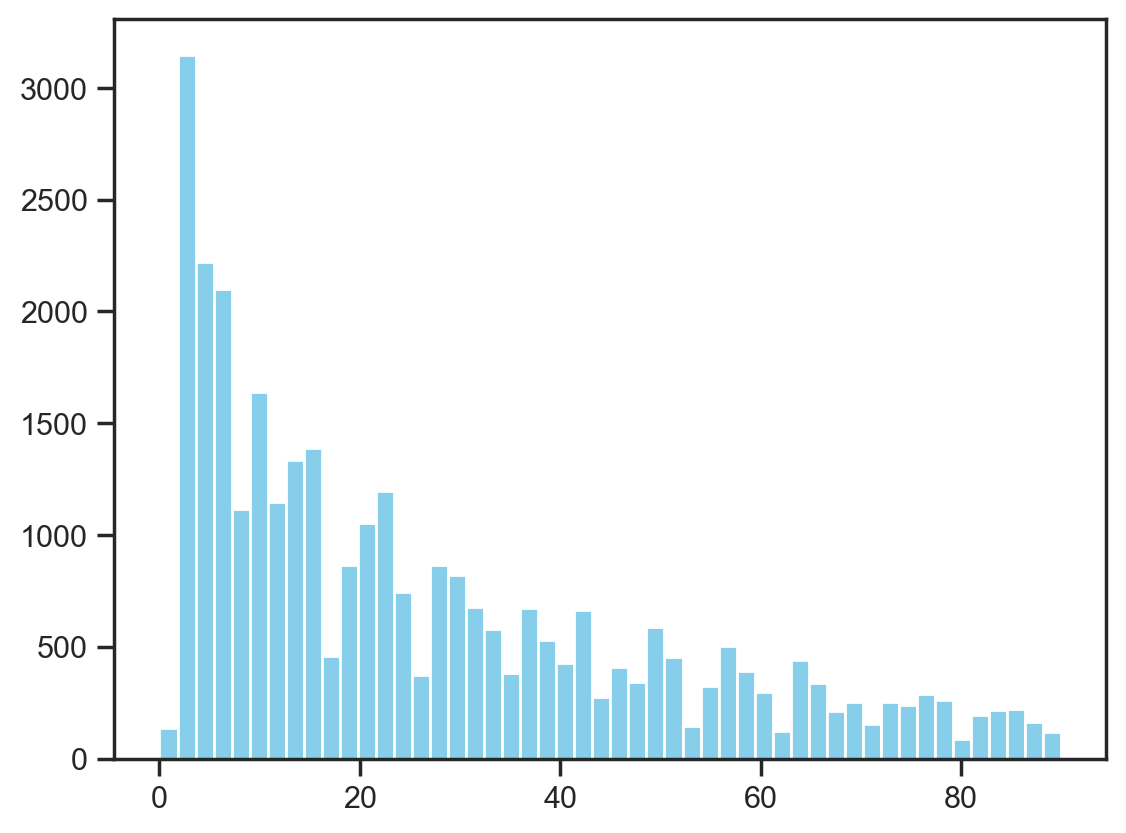

In [126]:
plt.hist(df['rcn'], bins=50, color='skyblue')  
plt.show()

In [127]:
df['CUI_diversity'] = cuisines.apply(lambda row: sum(row != 0), axis='columns')

In [128]:
df['CUI_diversity'].describe()

count    31875.000000
mean         1.945914
std          1.597874
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: CUI_diversity, dtype: float64

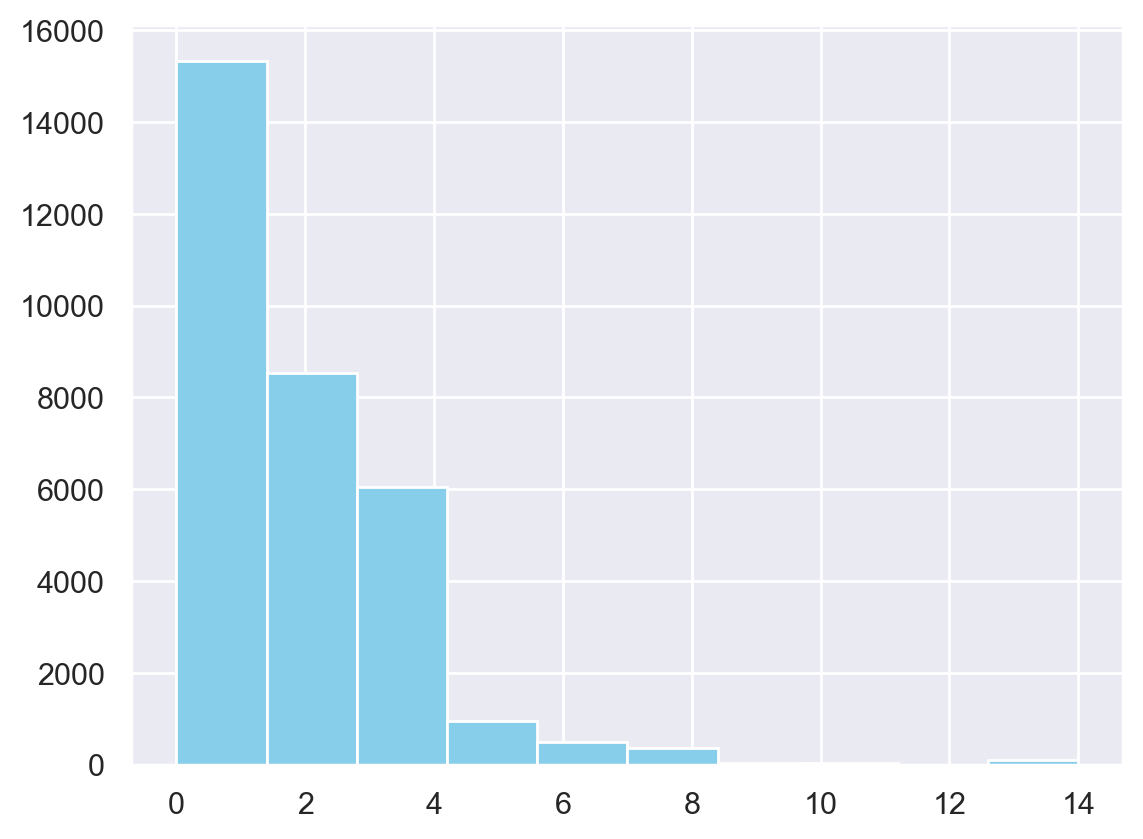

In [158]:
plt.hist(df['CUI_diversity'], bins=10, color='skyblue')  
plt.show()

<hr>
<a class="anchor" id="spearmancorrelation">
    
## 5.4 Spearman Correlation
    
</a>

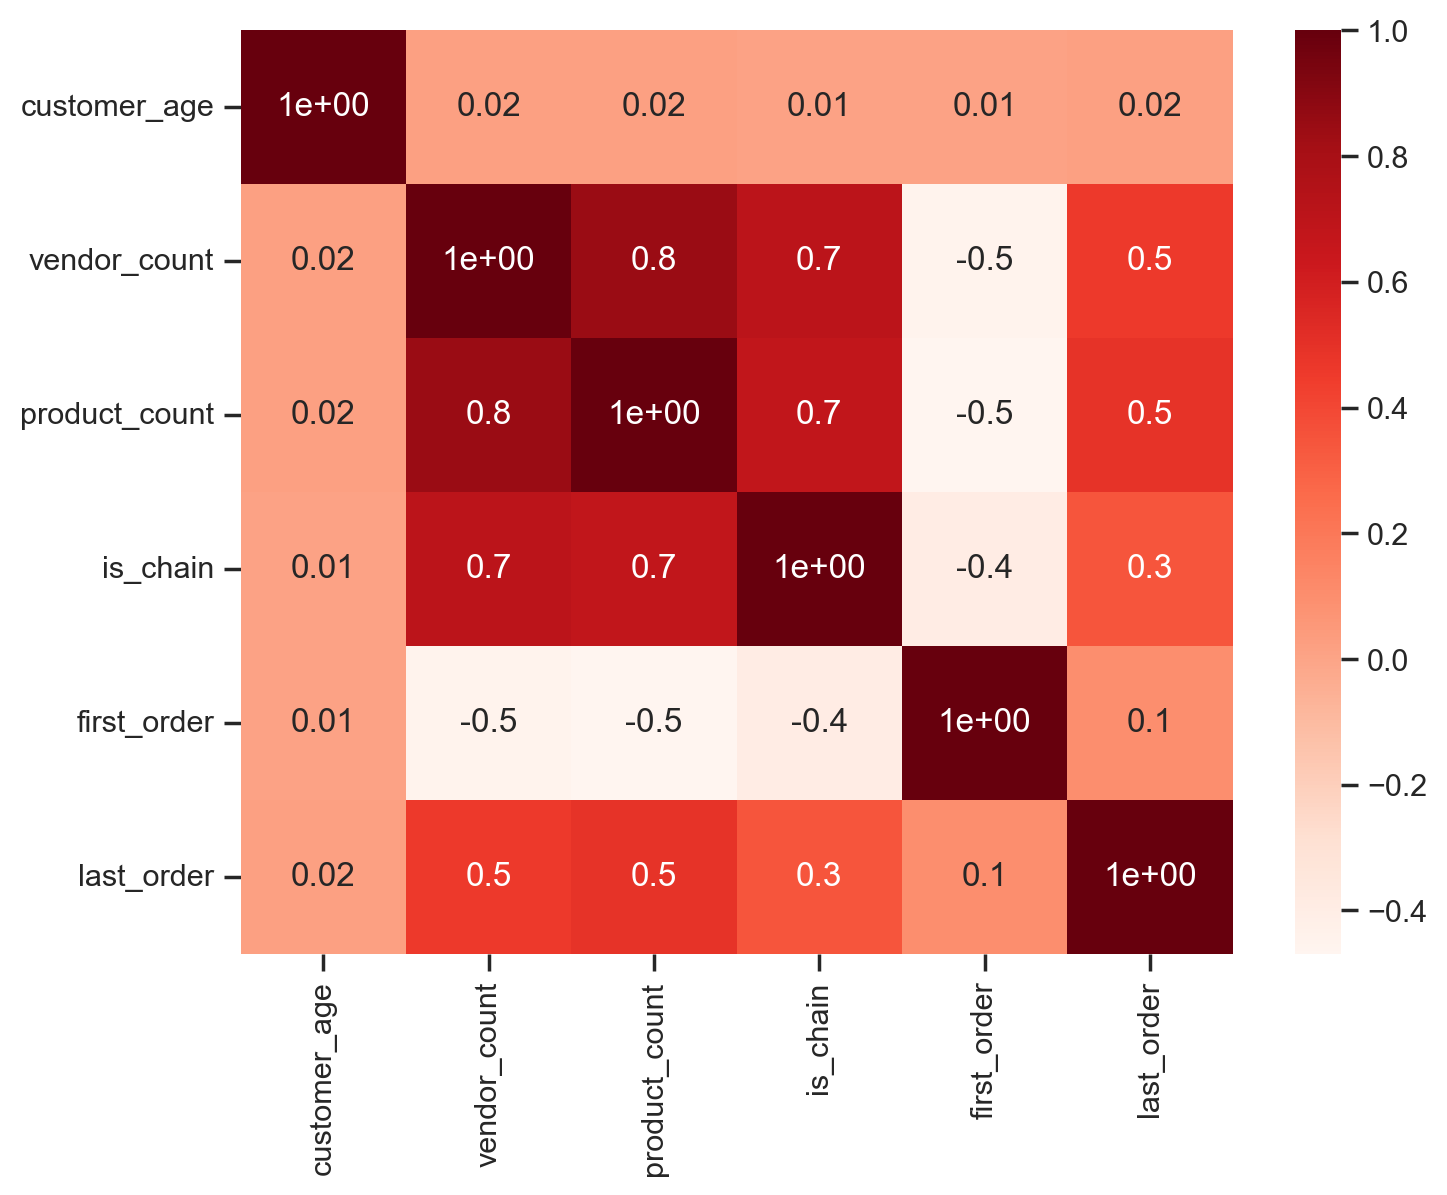

In [129]:
corr_metric = metric_variables.corr(method = 'spearman').round(2)
plt.figure(figsize=(8,6))
sns.heatmap(data = corr_metric, annot = True, cmap = plt.cm.Reds, fmt='.1')
plt.show() 

## Histograms

In [130]:
# Function to create a histogram
def create_histogram(data, title, xlabel, ylabel, color='skyblue', bins=50, range=range):
    plt.figure(figsize=(5, 3.5))
    plt.hist(data, bins=bins, color=color, range=range, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

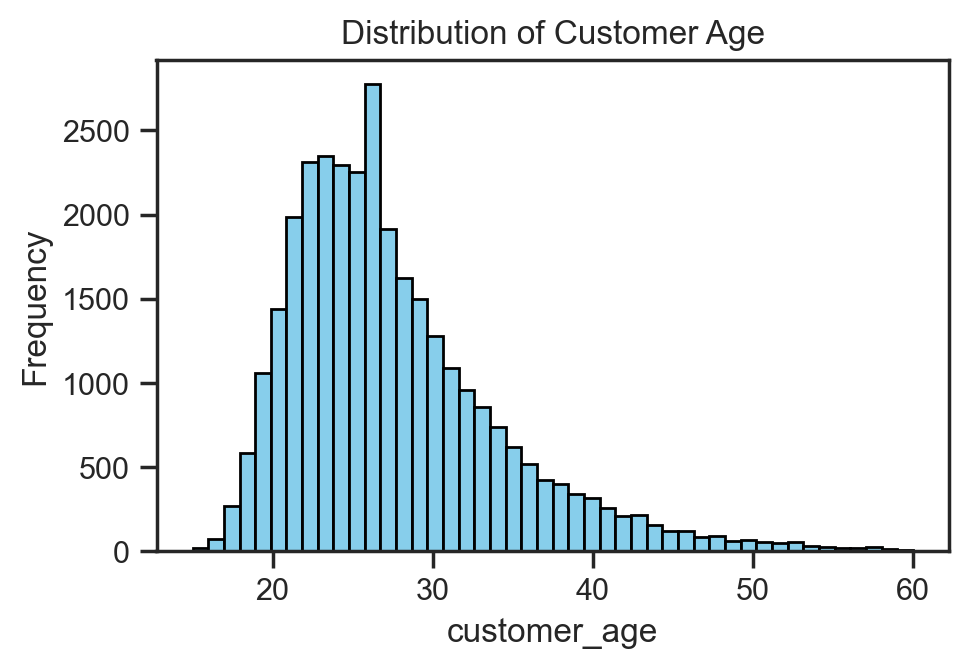

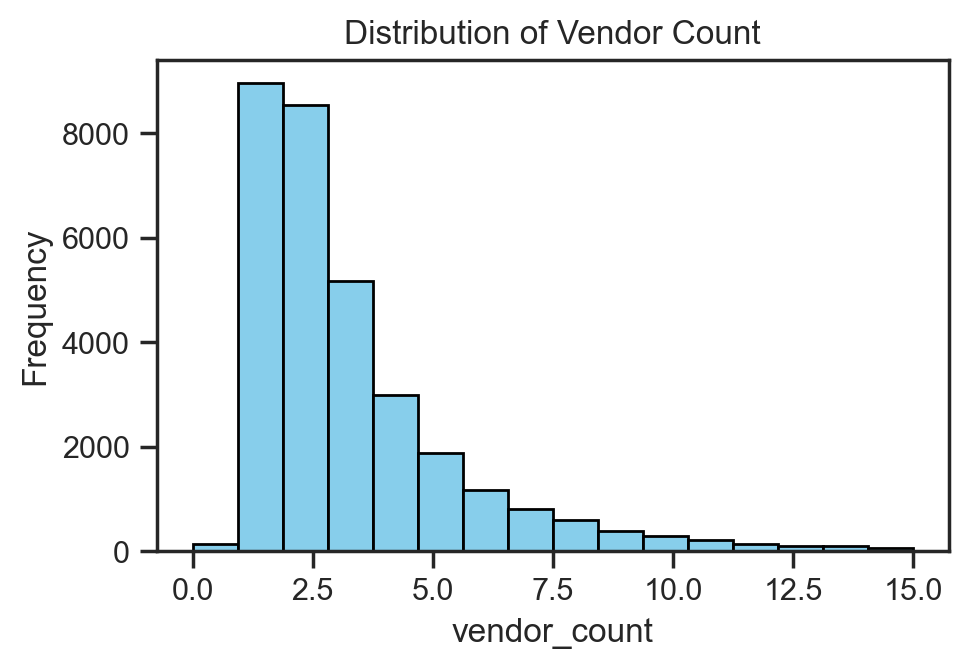

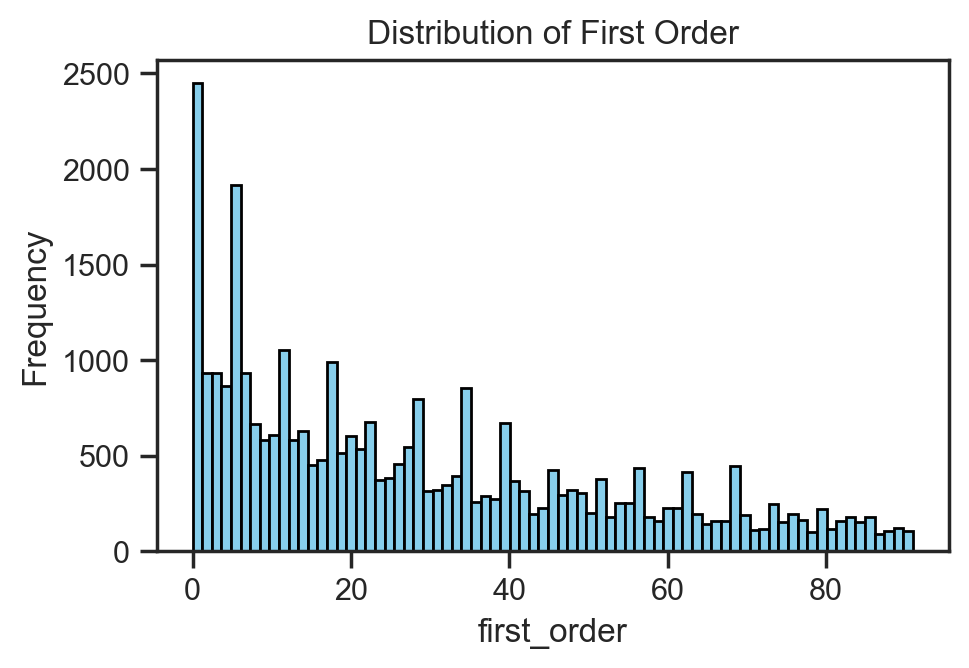

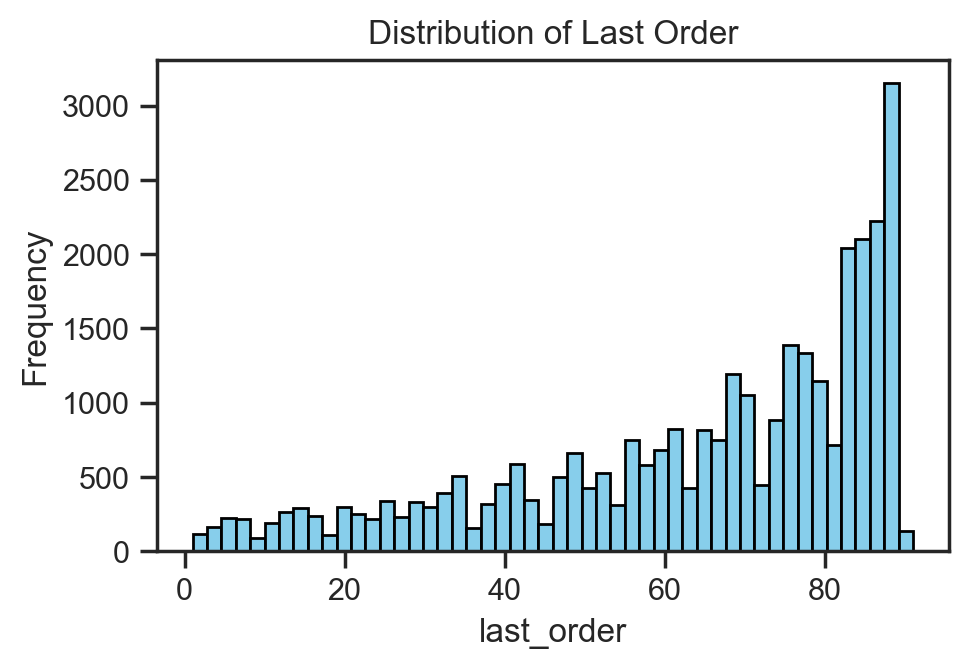

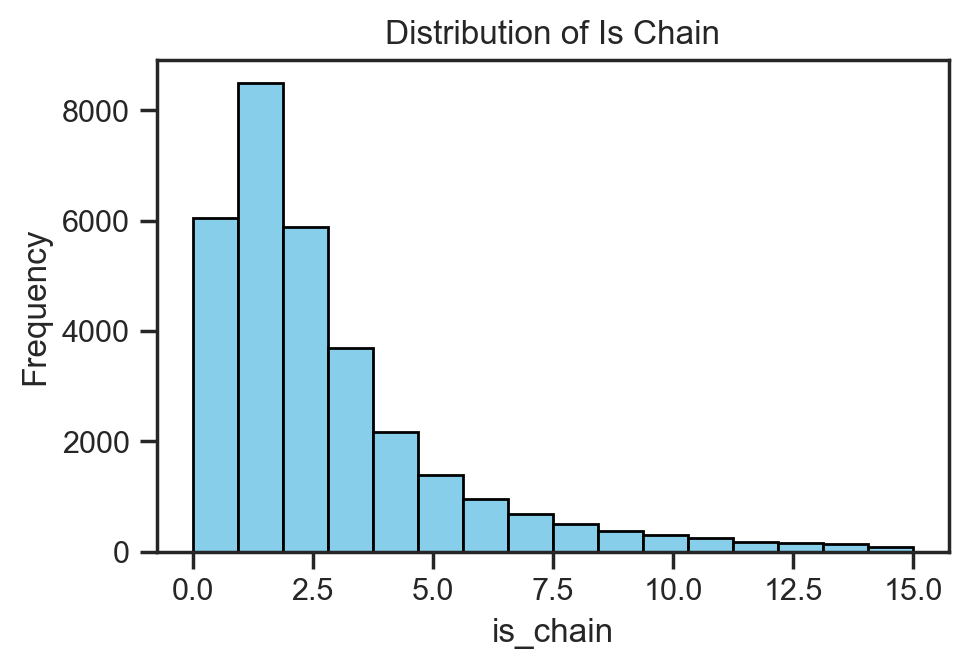

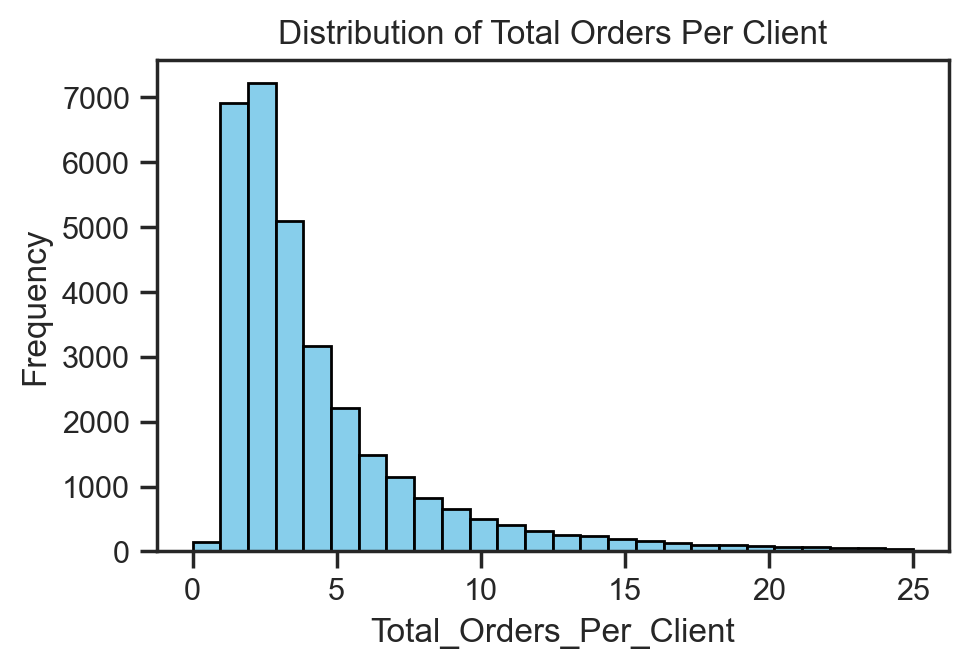

In [131]:
# Single value histograms (excluding customer_region, last_promo, and payment_method)
single_value_vars = ['customer_age', 'vendor_count', 'first_order', 'last_order','is_chain','Total_Orders_Per_Client']
bin_config = dict([
    ('customer_age', 46),
    ('vendor_count', 16),
    ('first_order', 75),
    ('last_order', 50),
    ('is_chain', 16),
    ('Total_Orders_Per_Client',26)
])
range_config = dict([
    ('customer_age', (15, 60)),
    ('vendor_count', (0, 15)),
    ('first_order', None),
    ('last_order', None),
    ('is_chain', (0, 15)),
    ('Total_Orders_Per_Client',(0,25))
])
sns.set_style('ticks')
for var in single_value_vars:
    title = f'Distribution of {var.replace("_", " ").title()}'
    bins = bin_config.get(var,50)
    range_tuple = range_config.get(var, (df[var].min(), df[var].max()))
    create_histogram(df[var], title, var, 'Frequency', bins = bins, range=range_tuple)

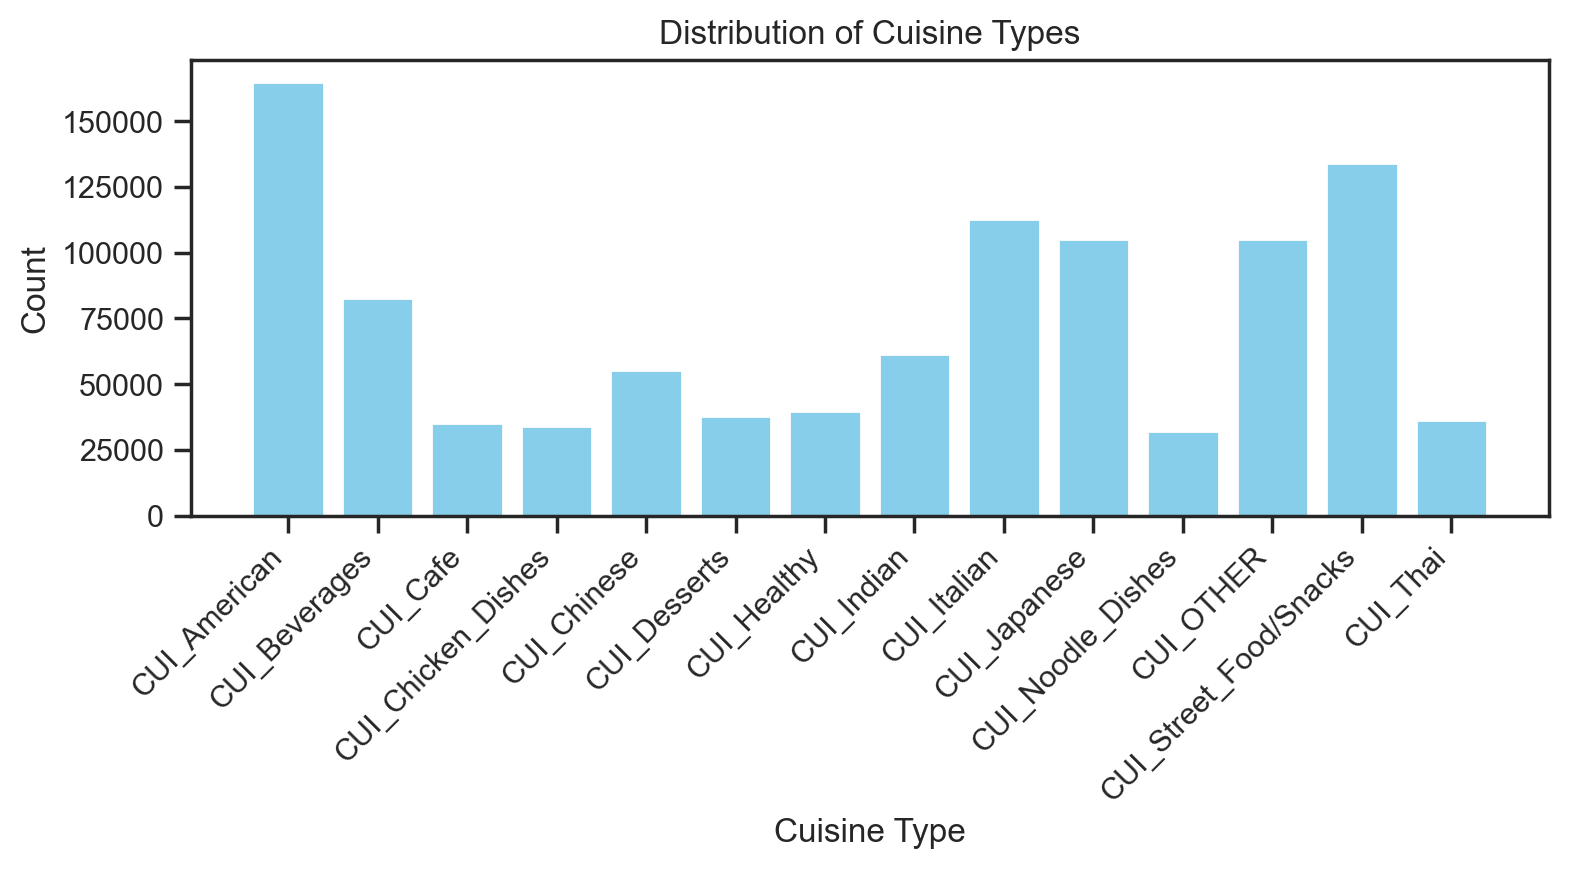

In [132]:
# Sum the orders for each cuisine in the 'cuisines' DataFrame
cuisine_counts = cuisines.sum()

# Plotting
plt.figure(figsize=(8, 4.5))
plt.bar(cuisine_counts.index, cuisine_counts.values, color='skyblue')
plt.title('Distribution of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Percentage of 'product_count' values that are <= 10: 86.73%


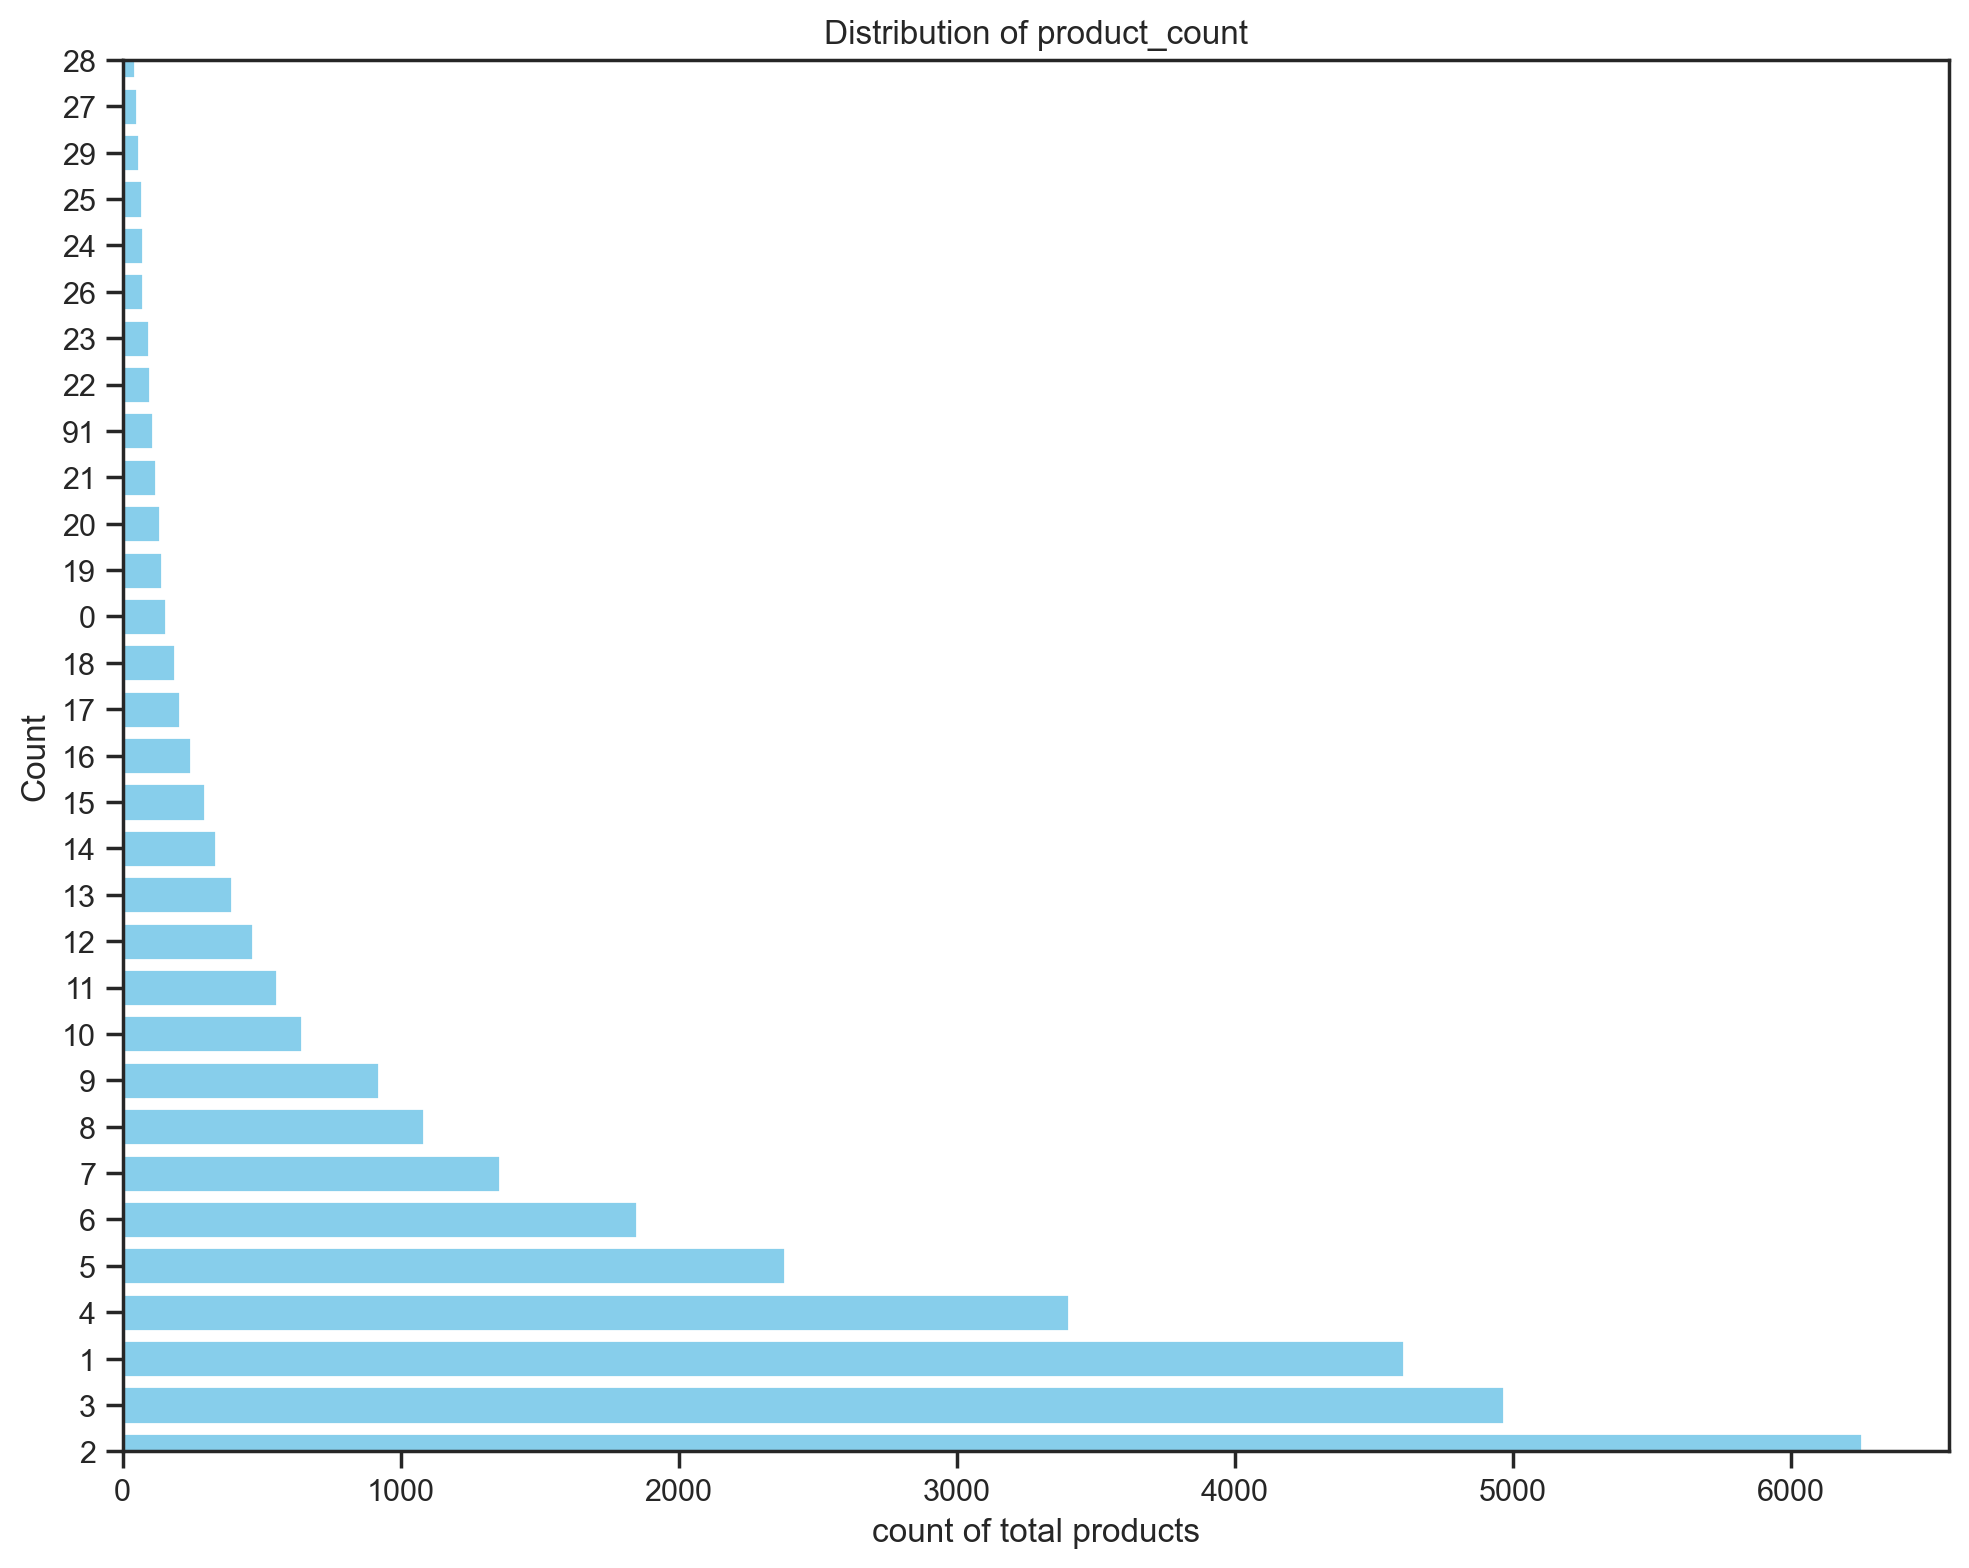

In [133]:
# Vertical bar chart for product_count
product_counts = df['product_count'].value_counts()
total_countPC = product_counts.sum()
below_equal_10_countPC = product_counts[product_counts.index <= 10].sum()
percentage_below_equal_10PC = (below_equal_10_countPC / total_countPC) * 100
print(f"Percentage of 'product_count' values that are <= 10: {percentage_below_equal_10PC:.2f}%")

plt.figure(figsize=(10, 8))
plt.barh(product_counts.index.astype(str), product_counts.values, color = 'skyblue')
plt.title('Distribution of product_count')
plt.xlabel('count of total products')
plt.ylabel('Count')
plt.ylim(0, 30)
plt.tight_layout()
plt.show()

Percentage of 'is_chain' values that are <= 10: 95.55%


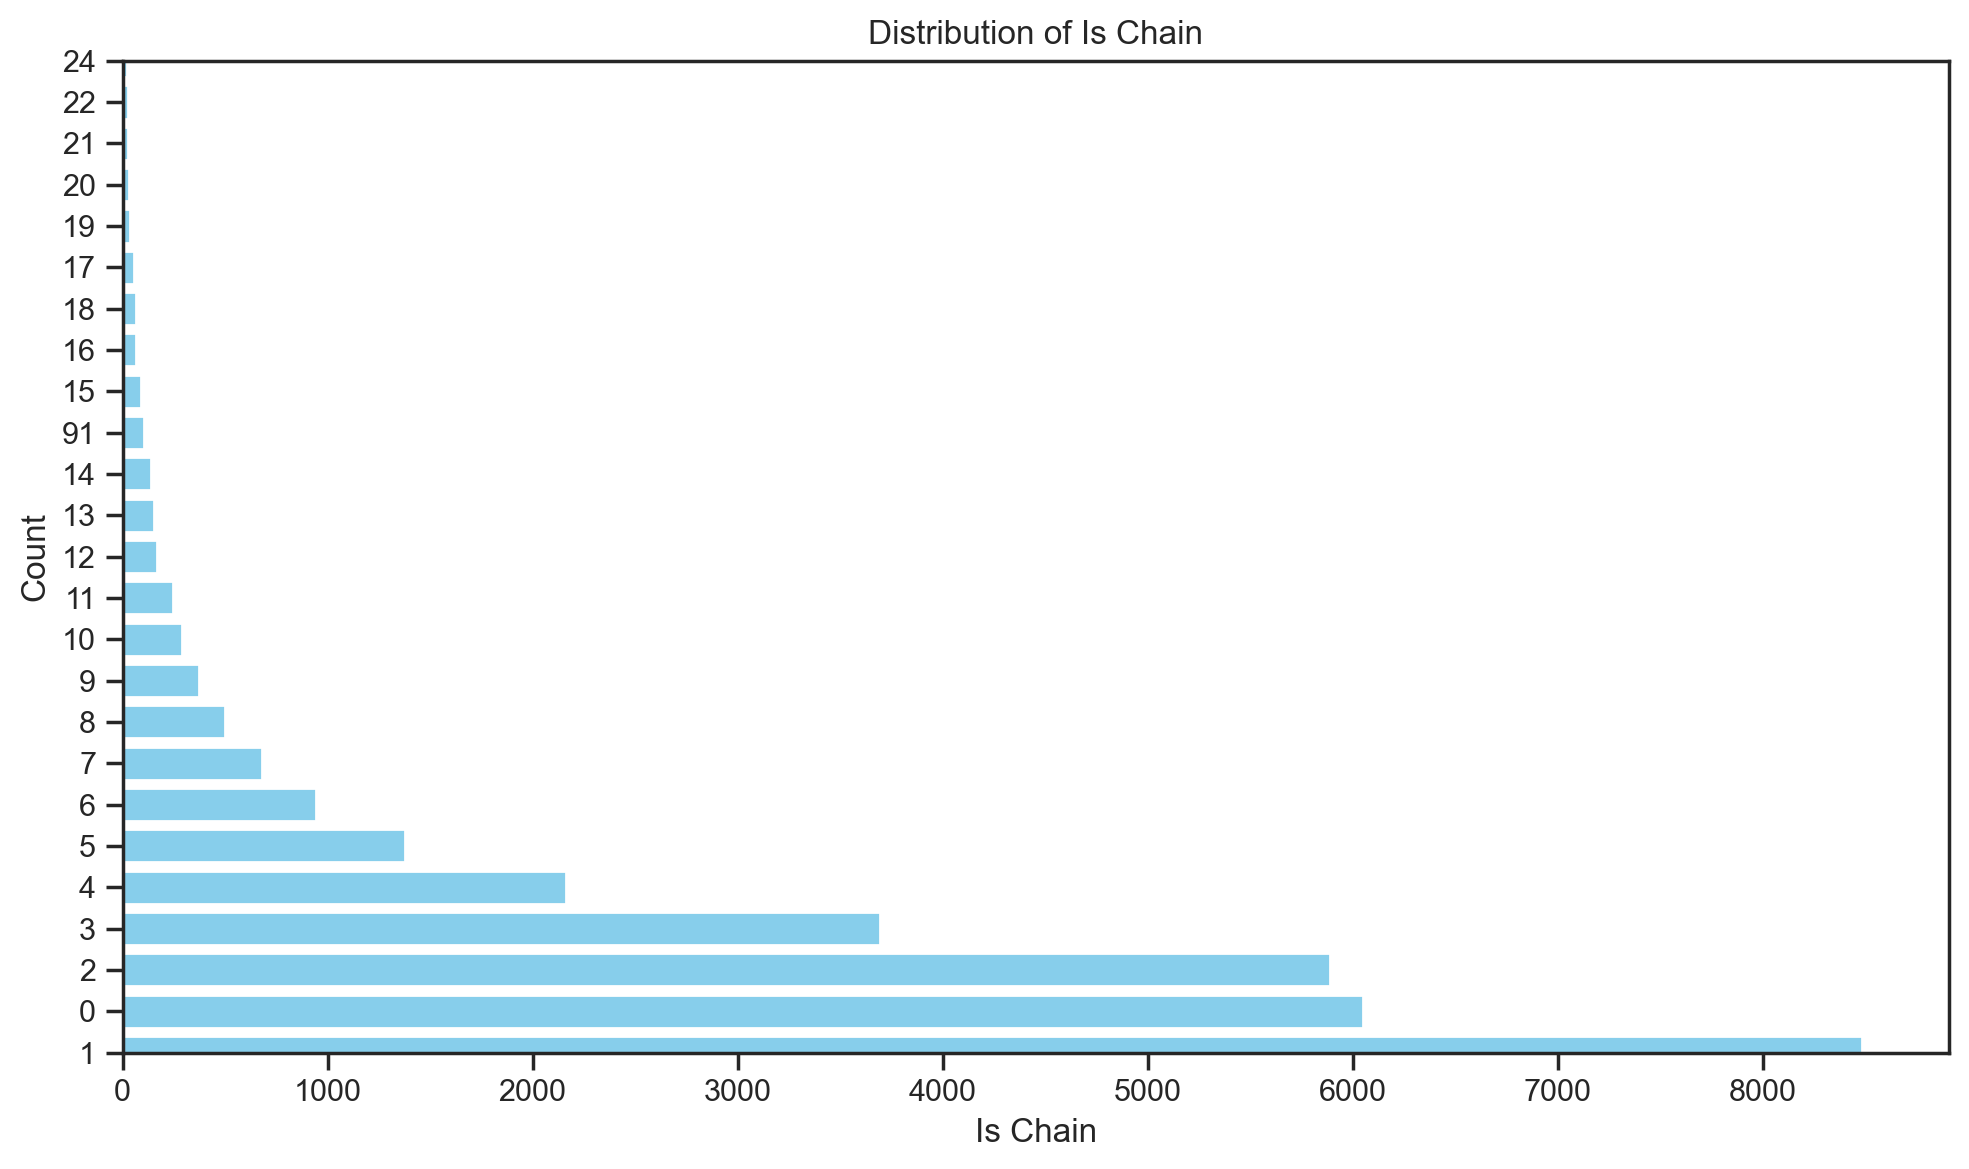

In [134]:
# Vertical bar chart for is_chain
is_chain_counts = df['is_chain'].value_counts()
total_count = is_chain_counts.sum()
below_equal_10_count = is_chain_counts[is_chain_counts.index <= 10].sum()
percentage_below_equal_10 = (below_equal_10_count / total_count) * 100
print(f"Percentage of 'is_chain' values that are <= 10: {percentage_below_equal_10:.2f}%")
plt.figure(figsize=(10, 6))
plt.barh(is_chain_counts.index.astype(str), is_chain_counts.values, color='skyblue')
plt.title('Distribution of Is Chain')
plt.xlabel('Is Chain')
plt.ylabel('Count')
plt.ylim(0, 24) # less than 1% of values are above 28, no need to visualize
plt.tight_layout()
plt.show()

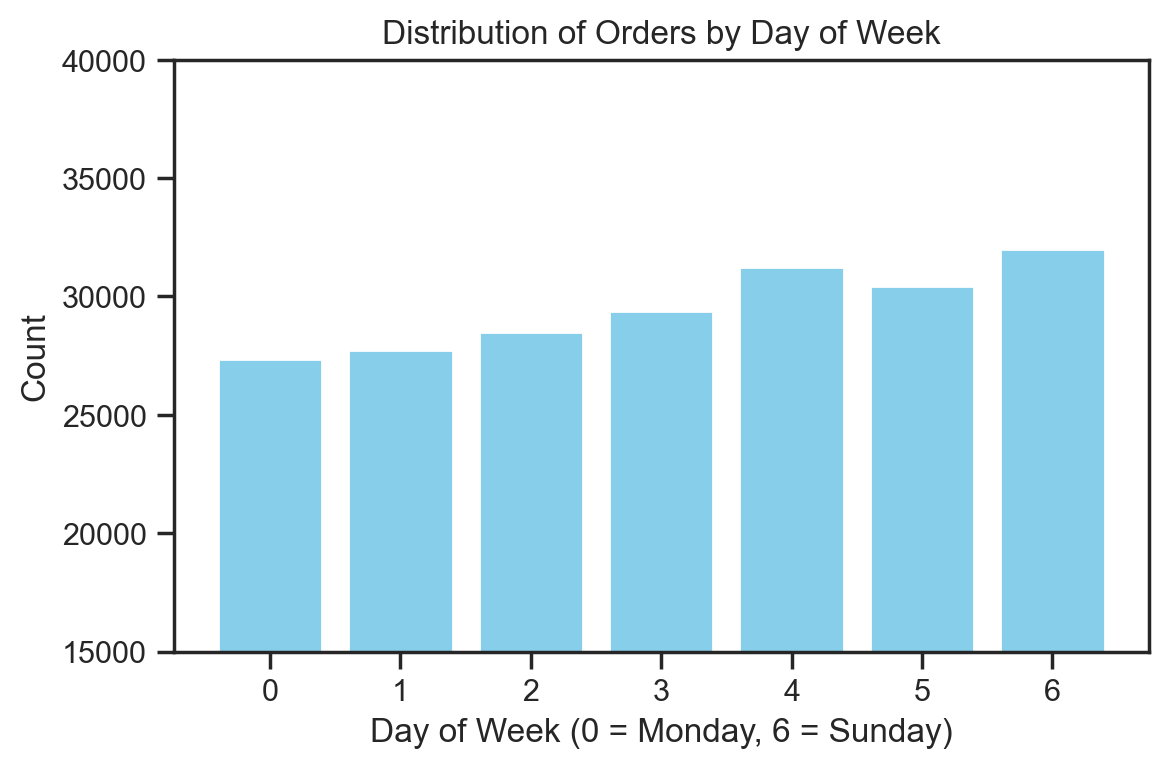

In [135]:
# Day of Week histogram
dow_counts = [df[f'DOW_{i}'].sum() for i in range(7)]

plt.figure(figsize=(6, 4))
plt.bar(range(7), dow_counts, color='skyblue')
plt.title('Distribution of Orders by Day of Week')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Count')
plt.xticks(range(7))
plt.ylim(15000, 40000)  # Start at 15000, end at 40000
plt.tight_layout()
plt.show()

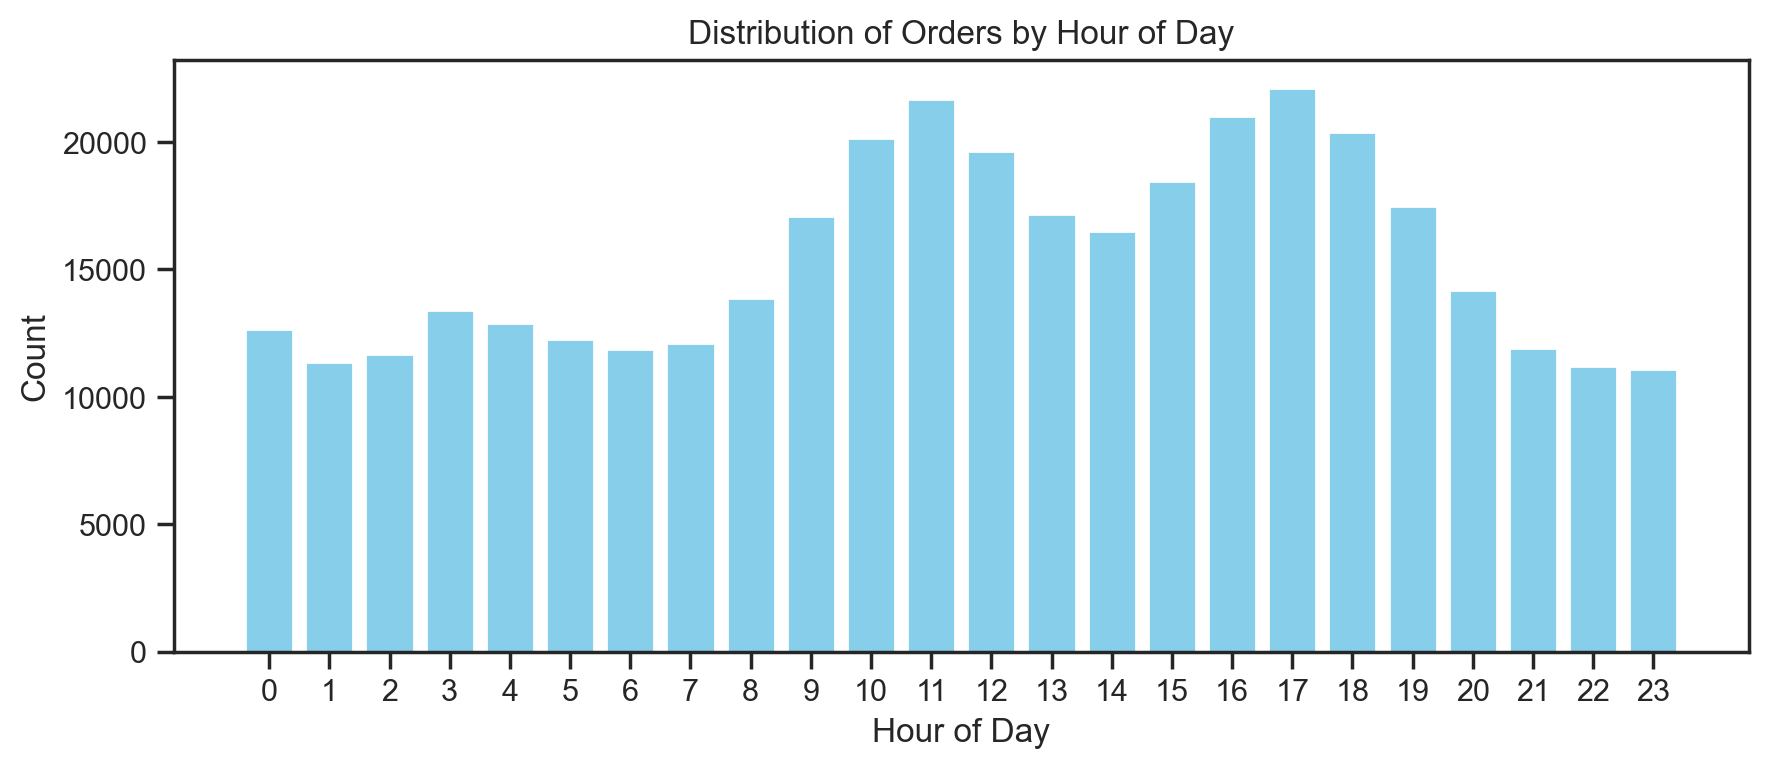

In [136]:
# Hour of Day histogram
hr_counts = [df[f'HR_{i}'].sum() for i in range(24)]

plt.figure(figsize=(9, 4))
plt.bar(range(24), hr_counts, color='skyblue')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

## Pie Charts

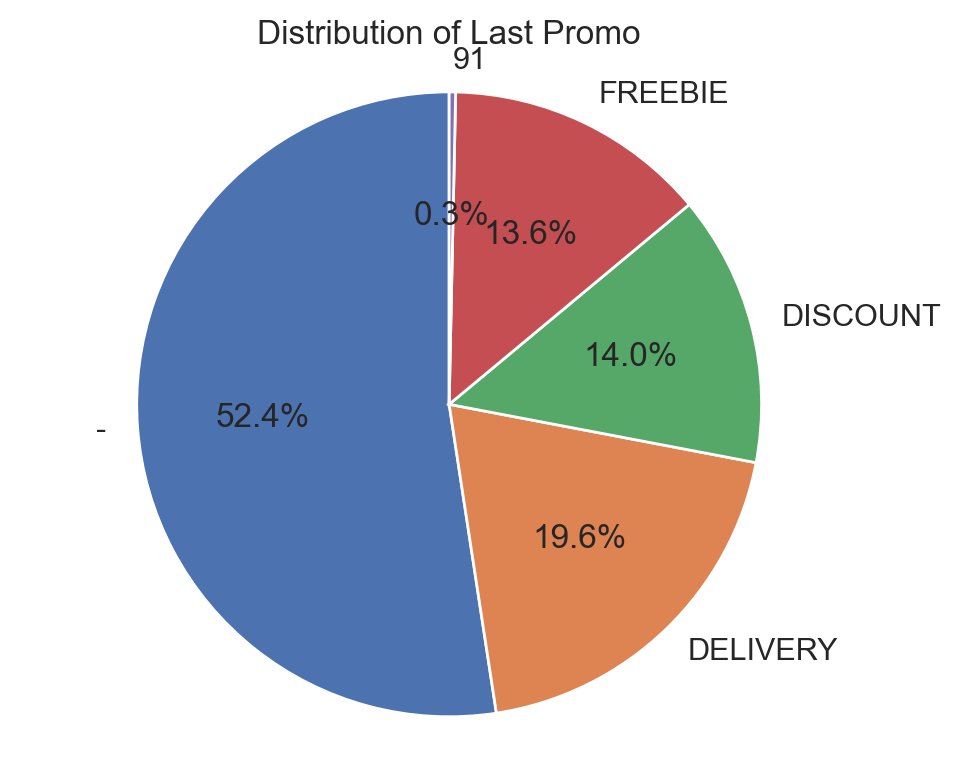

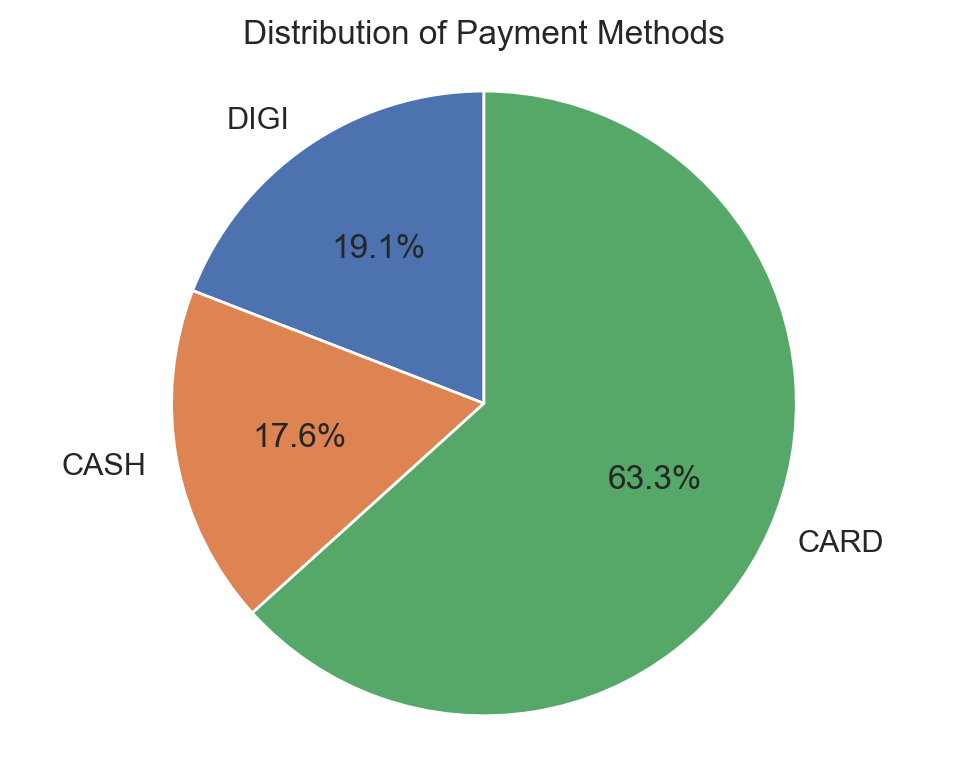

In [137]:
# Pie chart for last_promo
last_promo_counts = df['last_promo'].value_counts()
plt.figure(figsize=(5, 4))
plt.pie(last_promo_counts.values, labels=last_promo_counts.index.astype(str), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Last Promo')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Pie chart for payment method
payment_methods = ['DIGI', 'CASH', 'CARD']
payment_counts = [df[df['payment_method'] == method].shape[0] for method in payment_methods]

plt.figure(figsize=(5, 4))
plt.pie(payment_counts, labels=payment_methods, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Methods')
plt.axis('equal')
plt.tight_layout()
plt.show()

#Pie chart for customer_region
customer_region_counts = df['customer_region'].value_counts()
threshold = 0.04
others_value = customer_region_counts[customer_region_counts / sum(customer_region_counts) < threshold].sum()
customer_region_counts = customer_region_counts[customer_region_counts / sum(customer_region_counts) >= threshold]
customer_region_counts.loc['Others'] = others_value
plt.figure(figsize=(5, 4))
plt.pie(customer_region_counts.values, labels=customer_region_counts.index.astype(str), autopct=lambda p : '{:.1f}%'.format(p) if p >= 4 else ''
        , startangle=90)
plt.title('Distribution of Customer Region')
plt.axis('equal')
plt.tight_layout()
plt.show()

## BoxPlots

In [138]:
single_value_vars = ['customer_age', 'vendor_count', 'first_order', 'last_order','is_chain','Total_Orders_Per_Client']
sns.set_style('ticks')
sp_rows = 1
sp_cols = ceil(len(single_value_vars) / sp_rows)
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 6),
                         tight_layout=True
                        )
# Plot data
for ax, feat in zip(axes.flatten(), single_value_vars): 
    sns.boxplot(x=df[feat], ax=ax, color ='lightgreen')
# Remove excess axes
for ax in axes.flatten()[len(single_value_vars):]:
    ax.set_axis_off()

# Layout
title = "Numeric Variables' Box Plots"
plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))

plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)

plt.show()

In [139]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns for the subplots
n_vars = len(numeric_df.columns)
n_rows = (n_vars + 3) // 4  # 4 plots per row, rounded up
n_cols = min(n_vars, 4)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.suptitle('Boxplots of Numeric Variables', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each numeric variable
for i, column in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

# Remove any unused subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## Bivariate Analysis

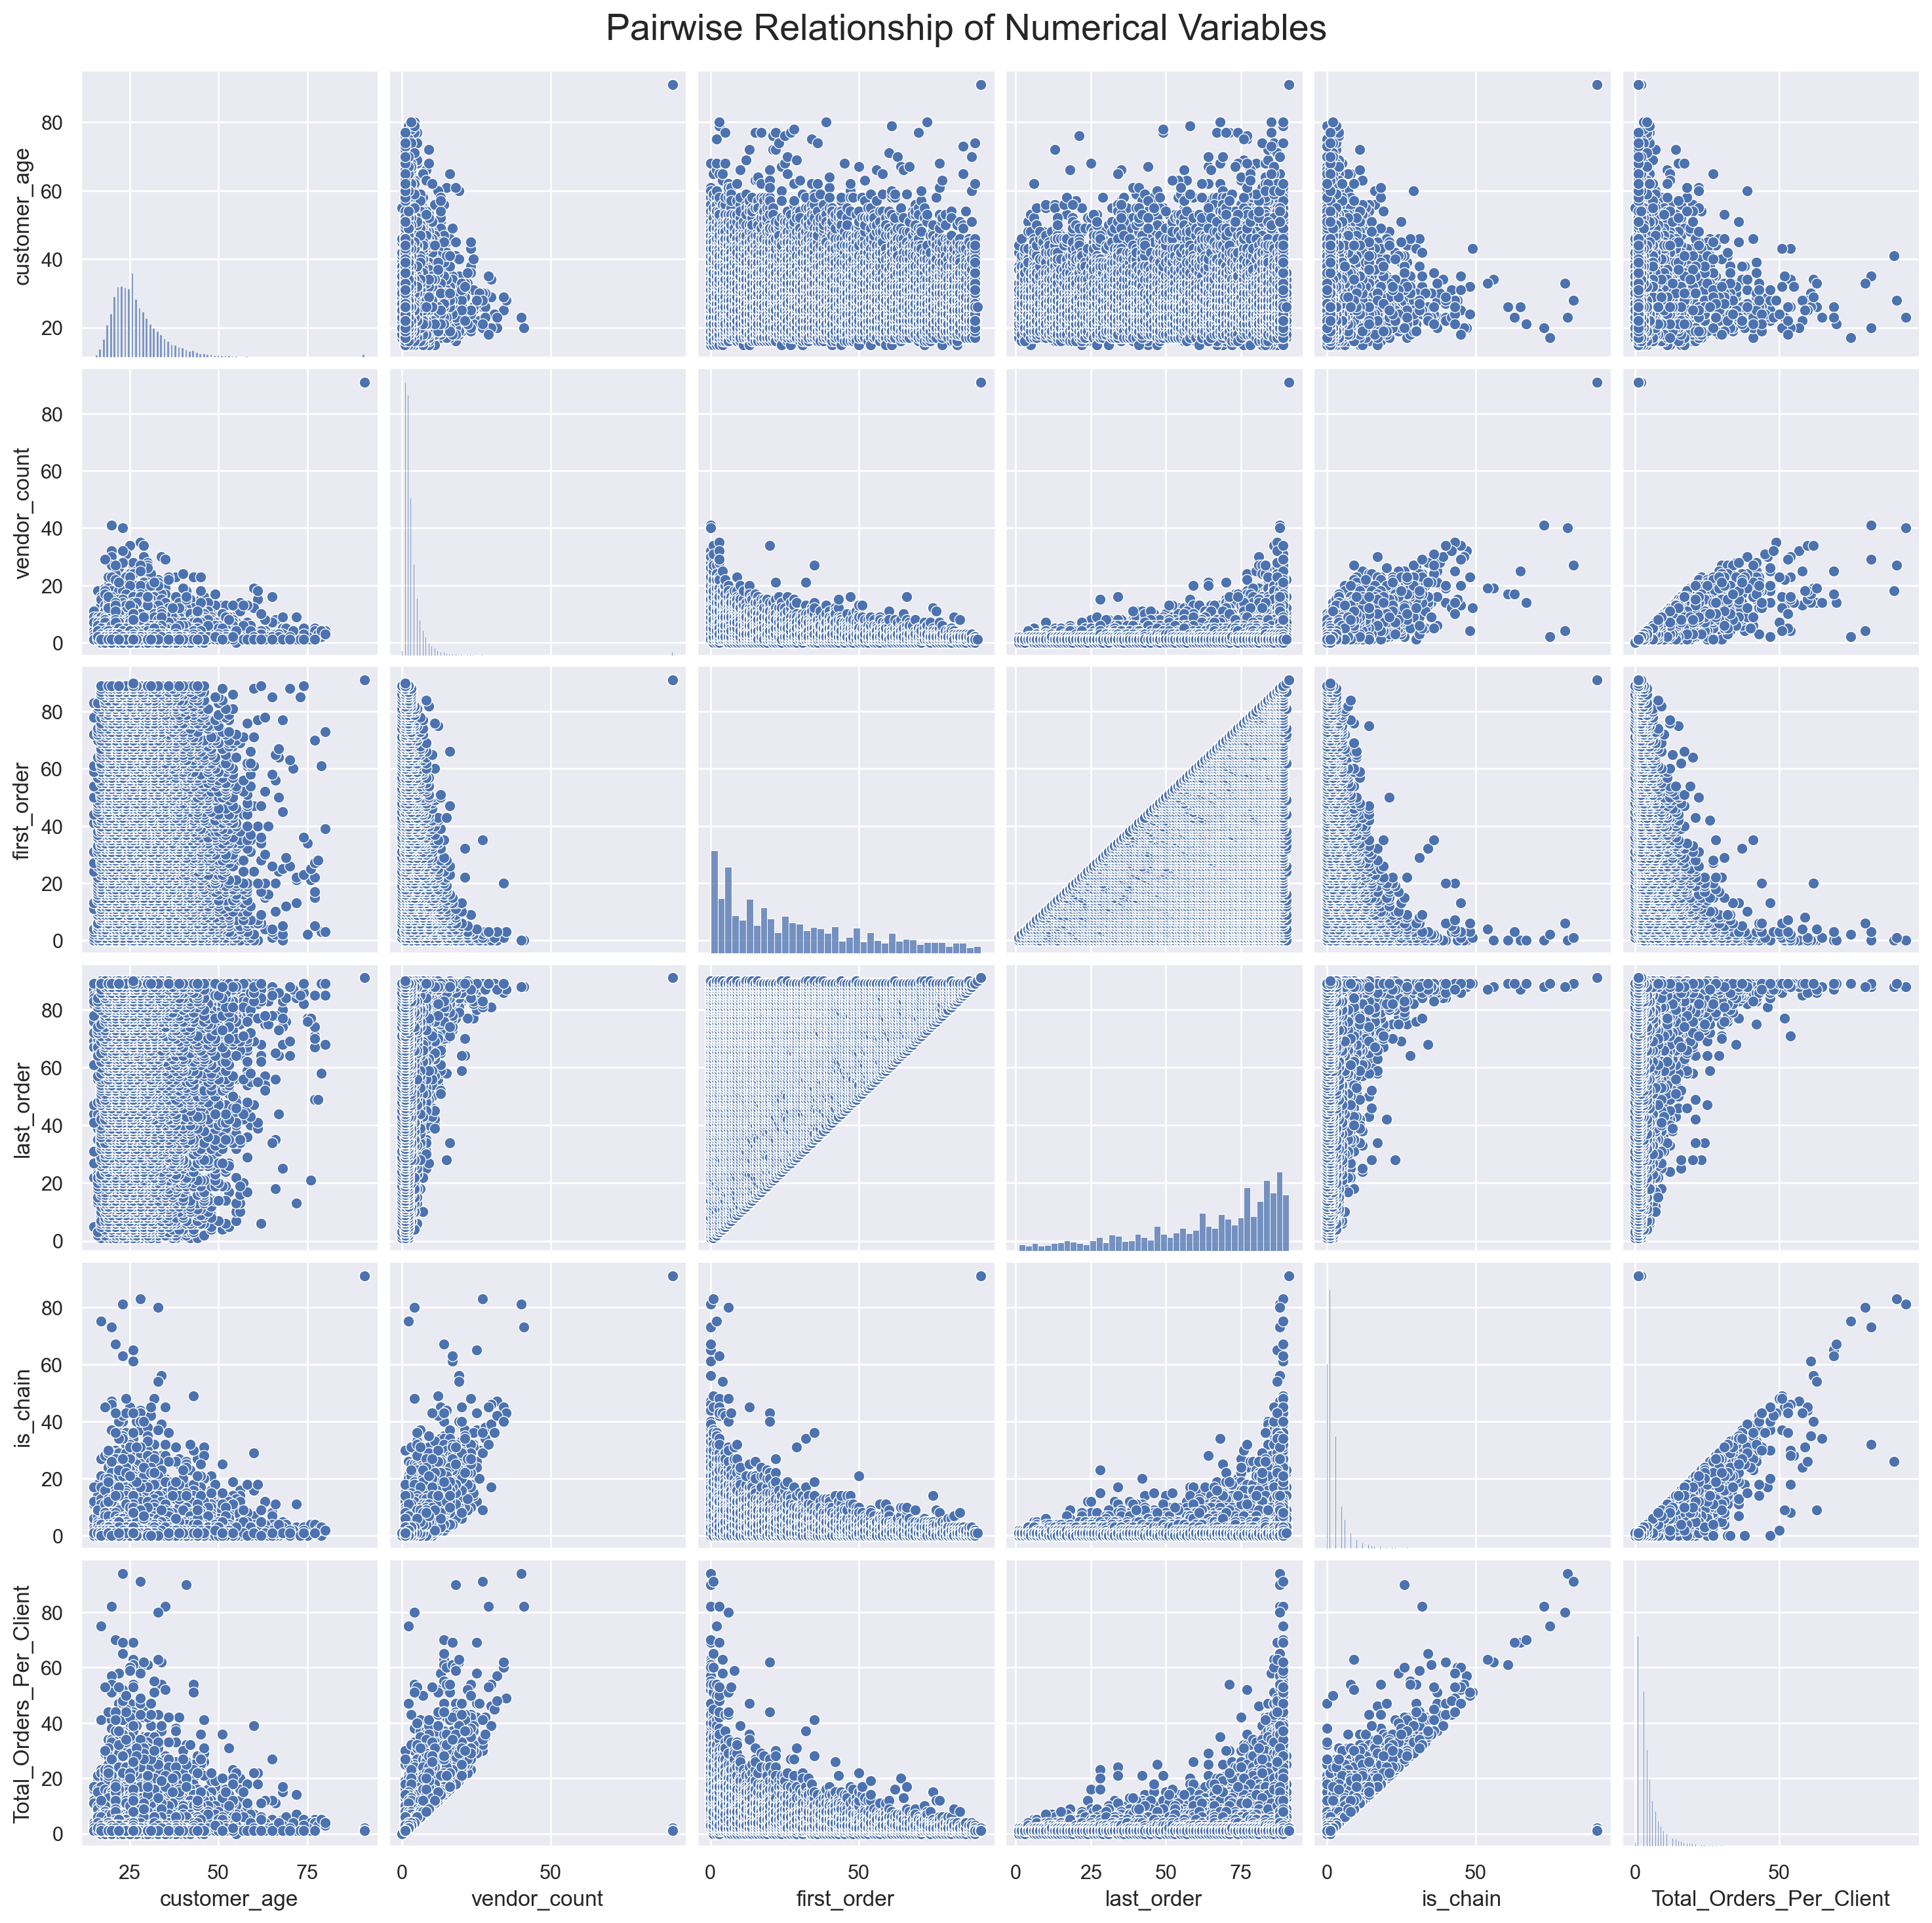

In [140]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[single_value_vars], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# if the eda directory is not present then create it first
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'pairwise_numeric_scatterplots.png'), dpi=200)
plt.show()

## Comparing two categorical variables

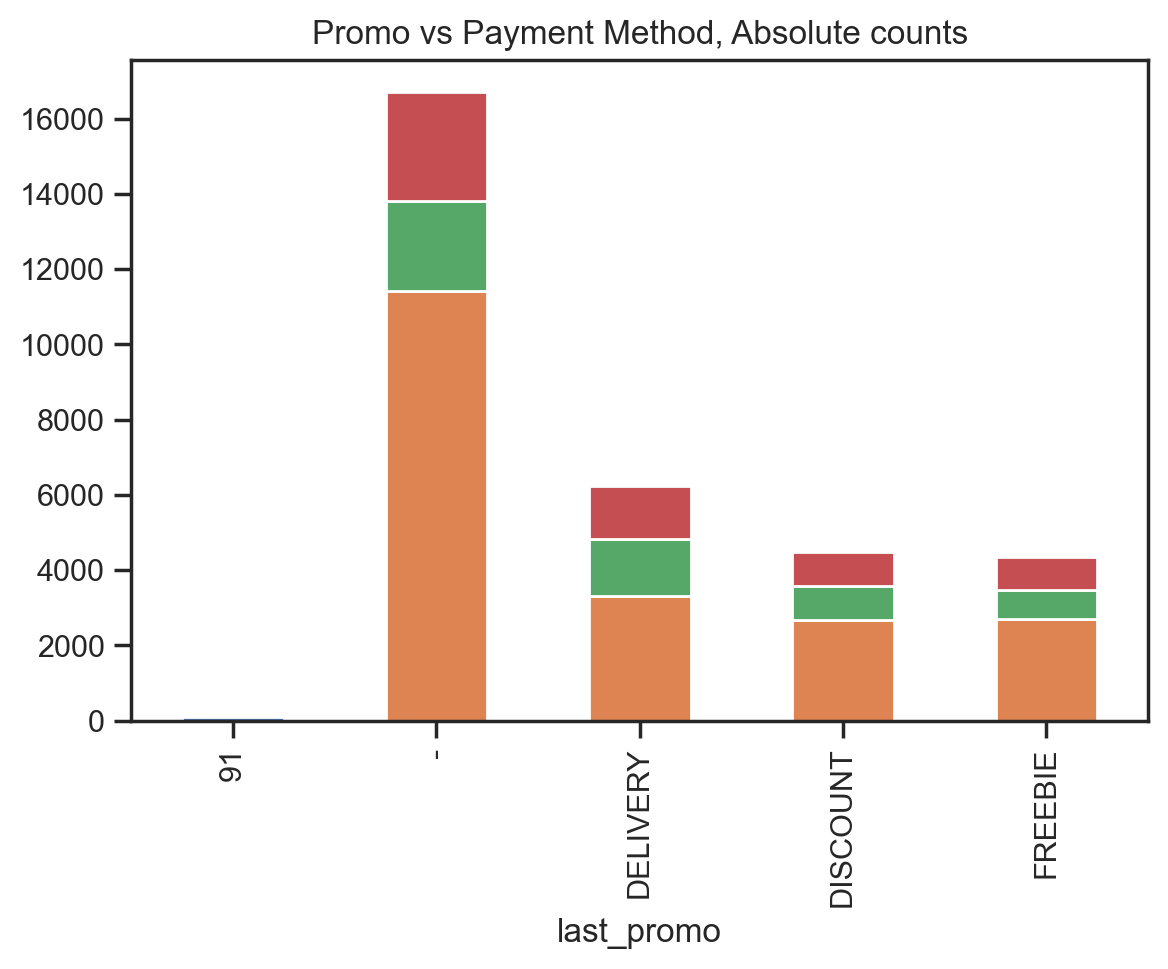

In [141]:
#there isnt much to take from these graphs
cat1 = 'last_promo'
cat2 = 'payment_method'
sns.set_style('ticks')
#create a figure and axis
fig, ax = plt.subplots(1, figsize=(6, 5))

#group and unstack data
catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()

#plot the data
catpc_df.plot.bar(stacked=True, ax=ax)

#customization
ax.set_title('Promo vs Payment Method, Absolute counts')
ax.legend([], frameon=False)

plt.tight_layout()
plt.show()

In [142]:
cat1 = 'customer_region'
cat2 = 'last_promo'
sns.set_style('ticks')
fig, axes = plt.subplots(1,2, figsize=(12,4))

catpc_df = df.groupby([cat1, cat2])[cat2].size().unstack()
catpc_df.plot.bar(stacked=True, ax=axes[0])
axes[0].legend([], frameon=False)
axes[0].set_title('Region vs Promo, Absolute counts')

catpc_df2 = df.groupby([cat1, cat2])[cat2].size() / df.groupby([cat1])[cat2].size() 

catpc_df2.unstack().plot.bar(stacked=True, ax=axes[1])
axes[1].set_title('Region vs Promo, Relative counts')
axes[1].legend(loc=(1.01,0))

plt.show()


plt.show()

## Density Plots

In [143]:
sns.set()

sns.kdeplot(data=df, x='customer_age',
            y='Total_Orders_Per_Client',
            hue='payment_method')
plt.title(f"KDE Plot: {'Costumer Age'} vs {'Total Orders Per Client'}")
plt.show()

## OTHER

In [144]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns for the subplots
n_vars = len(numeric_df.columns)
n_rows = (n_vars + 3) // 4  # 4 plots per row, rounded up
n_cols = min(n_vars, 4)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
fig.suptitle('Violin Plots of Numeric Variables', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a violin plot for each numeric variable
for i, column in enumerate(numeric_df.columns):
    sns.violinplot(y=numeric_df[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')

    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()